In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics

# use hierarchical clustering to determine the centroids of kmeans
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/incident_profile_95_cleaned.csv')
df.columns.sort_values()

Index(['AGE_GROUP_15_26', 'AGE_GROUP_26_33', 'AGE_GROUP_33_43',
       'AGE_GROUP_43_55', 'AGE_GROUP_55_104', 'BEAT_OF_OCCURRENCE',
       'CRASH_MONTH', 'CRASH_YEAR', 'adverse_weather_crash_rate', 'avg_age',
       'avg_crash_severity_score', 'avg_lighting_severity',
       'avg_responsibility_score', 'avg_roadway_severity',
       'avg_weather_severity', 'combined_weather_road_severity',
       'damage_cost_LB', 'damage_high', 'damage_low', 'damage_medium',
       'damage_severity_avg', 'fatality_rate', 'injury_severity_score',
       'monthly_total_units', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'sum_category_motorcycle',
       'sum_category_off-road/specialized', 'sum_category_passenger vehicle',
       'sum_category_public transport', 'sum_category_truck/commercial',
       'sum_damage_category_hig

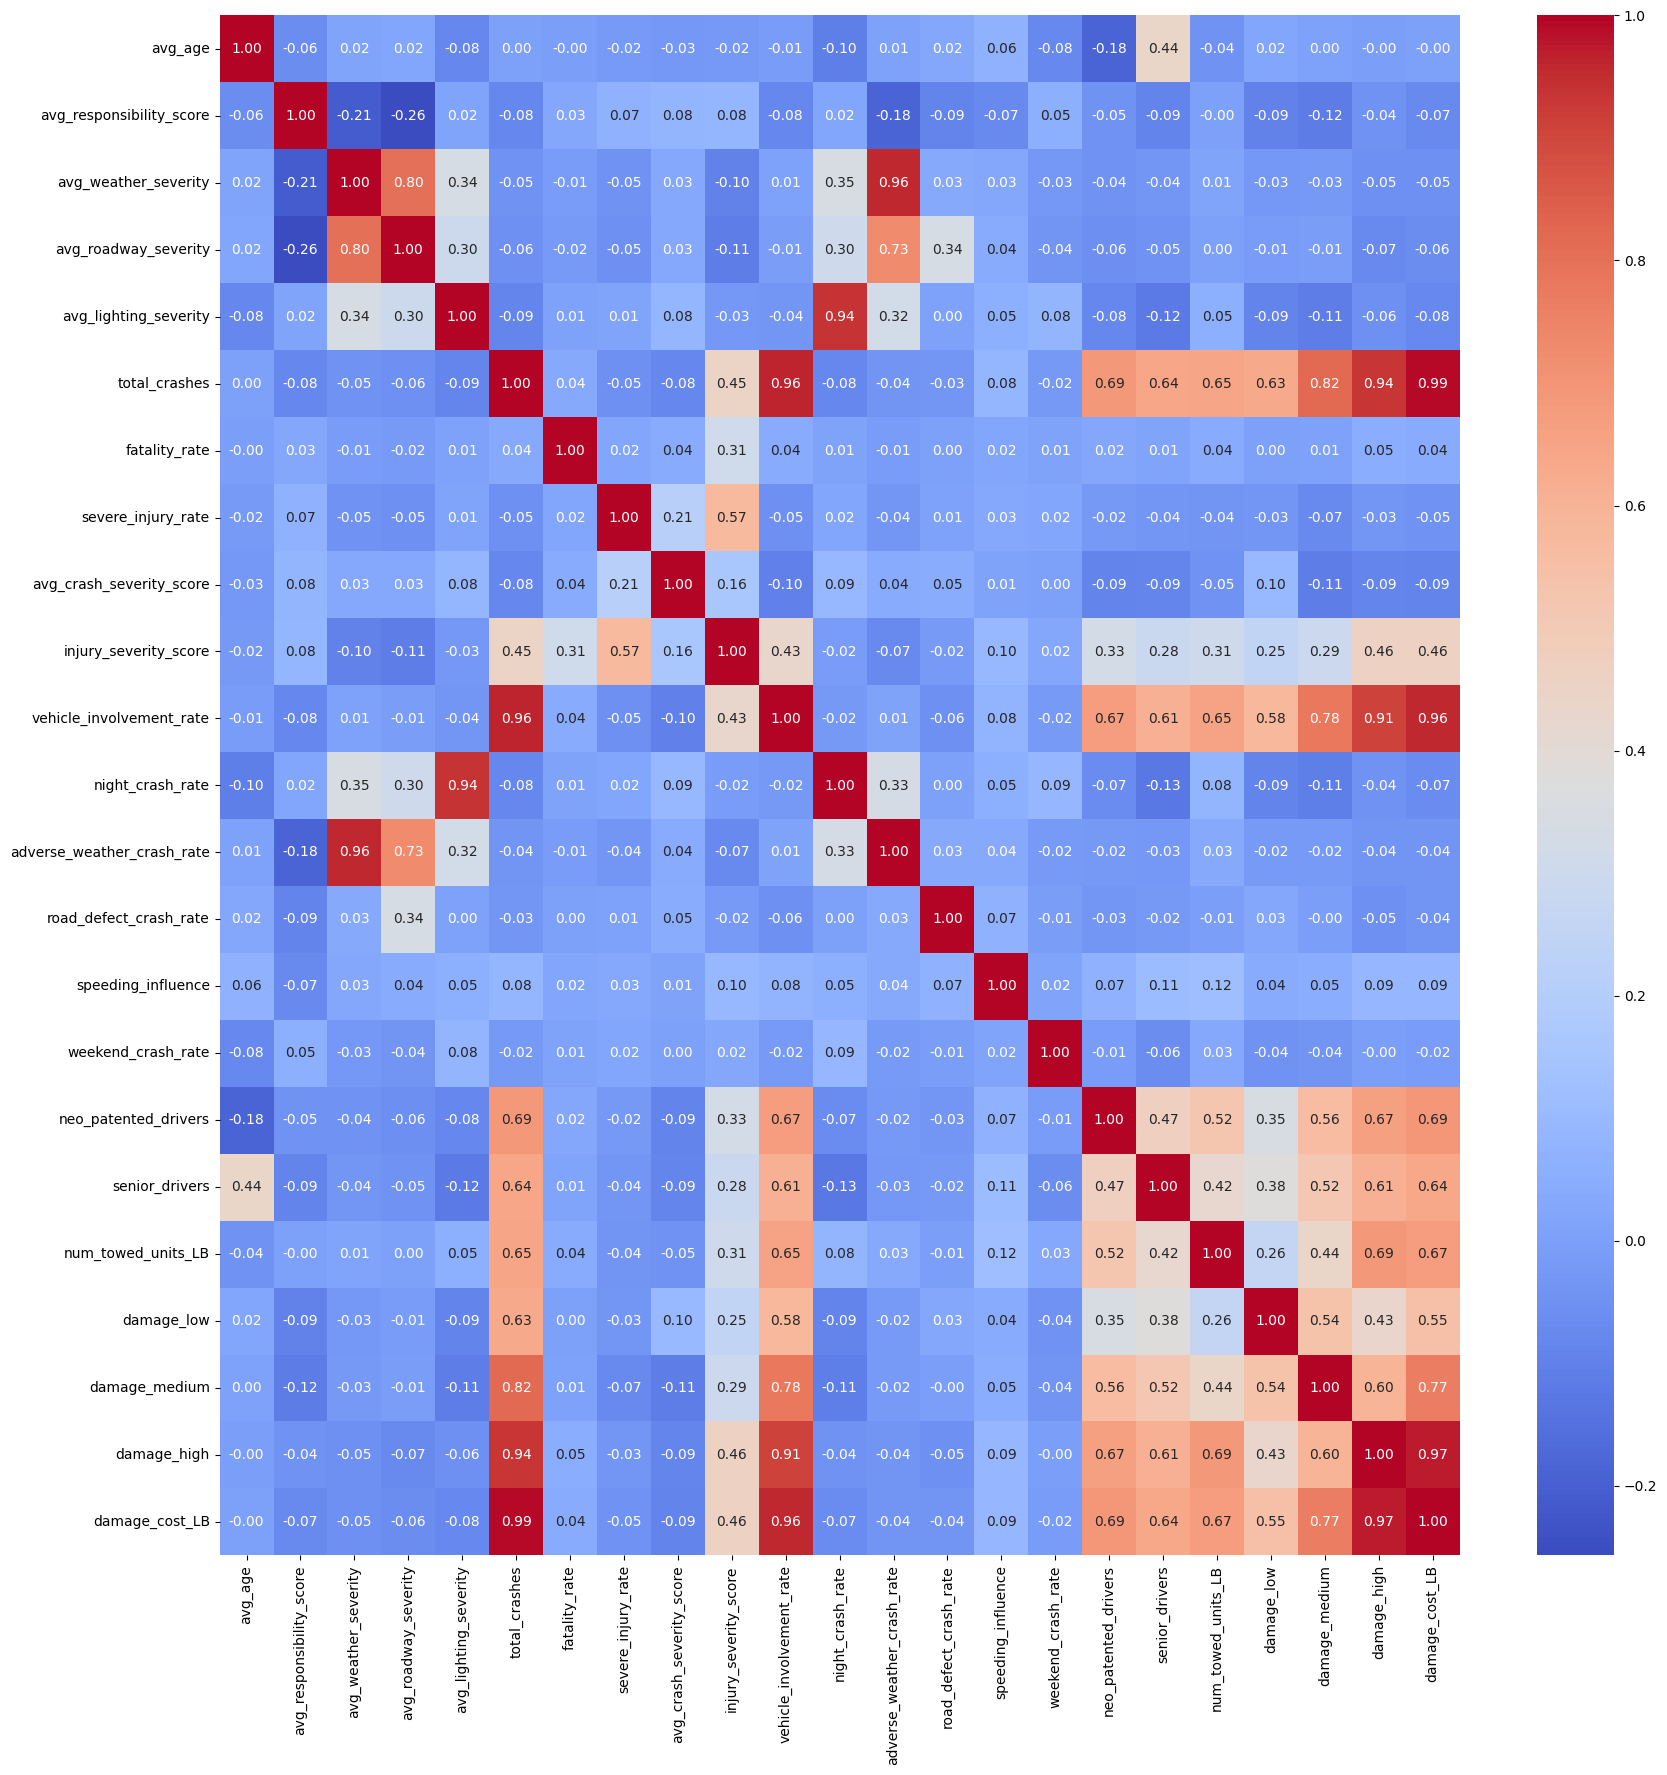

In [79]:
columns = ['avg_age', 'avg_responsibility_score', 'avg_weather_severity',
           'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'night_crash_rate', 'adverse_weather_crash_rate', 'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'neo_patented_drivers', 'senior_drivers', 'num_towed_units_LB', 'damage_low','damage_medium', 
           'damage_high', 'damage_cost_LB']

plt.figure(figsize=(20, 20))
sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Features for clustering

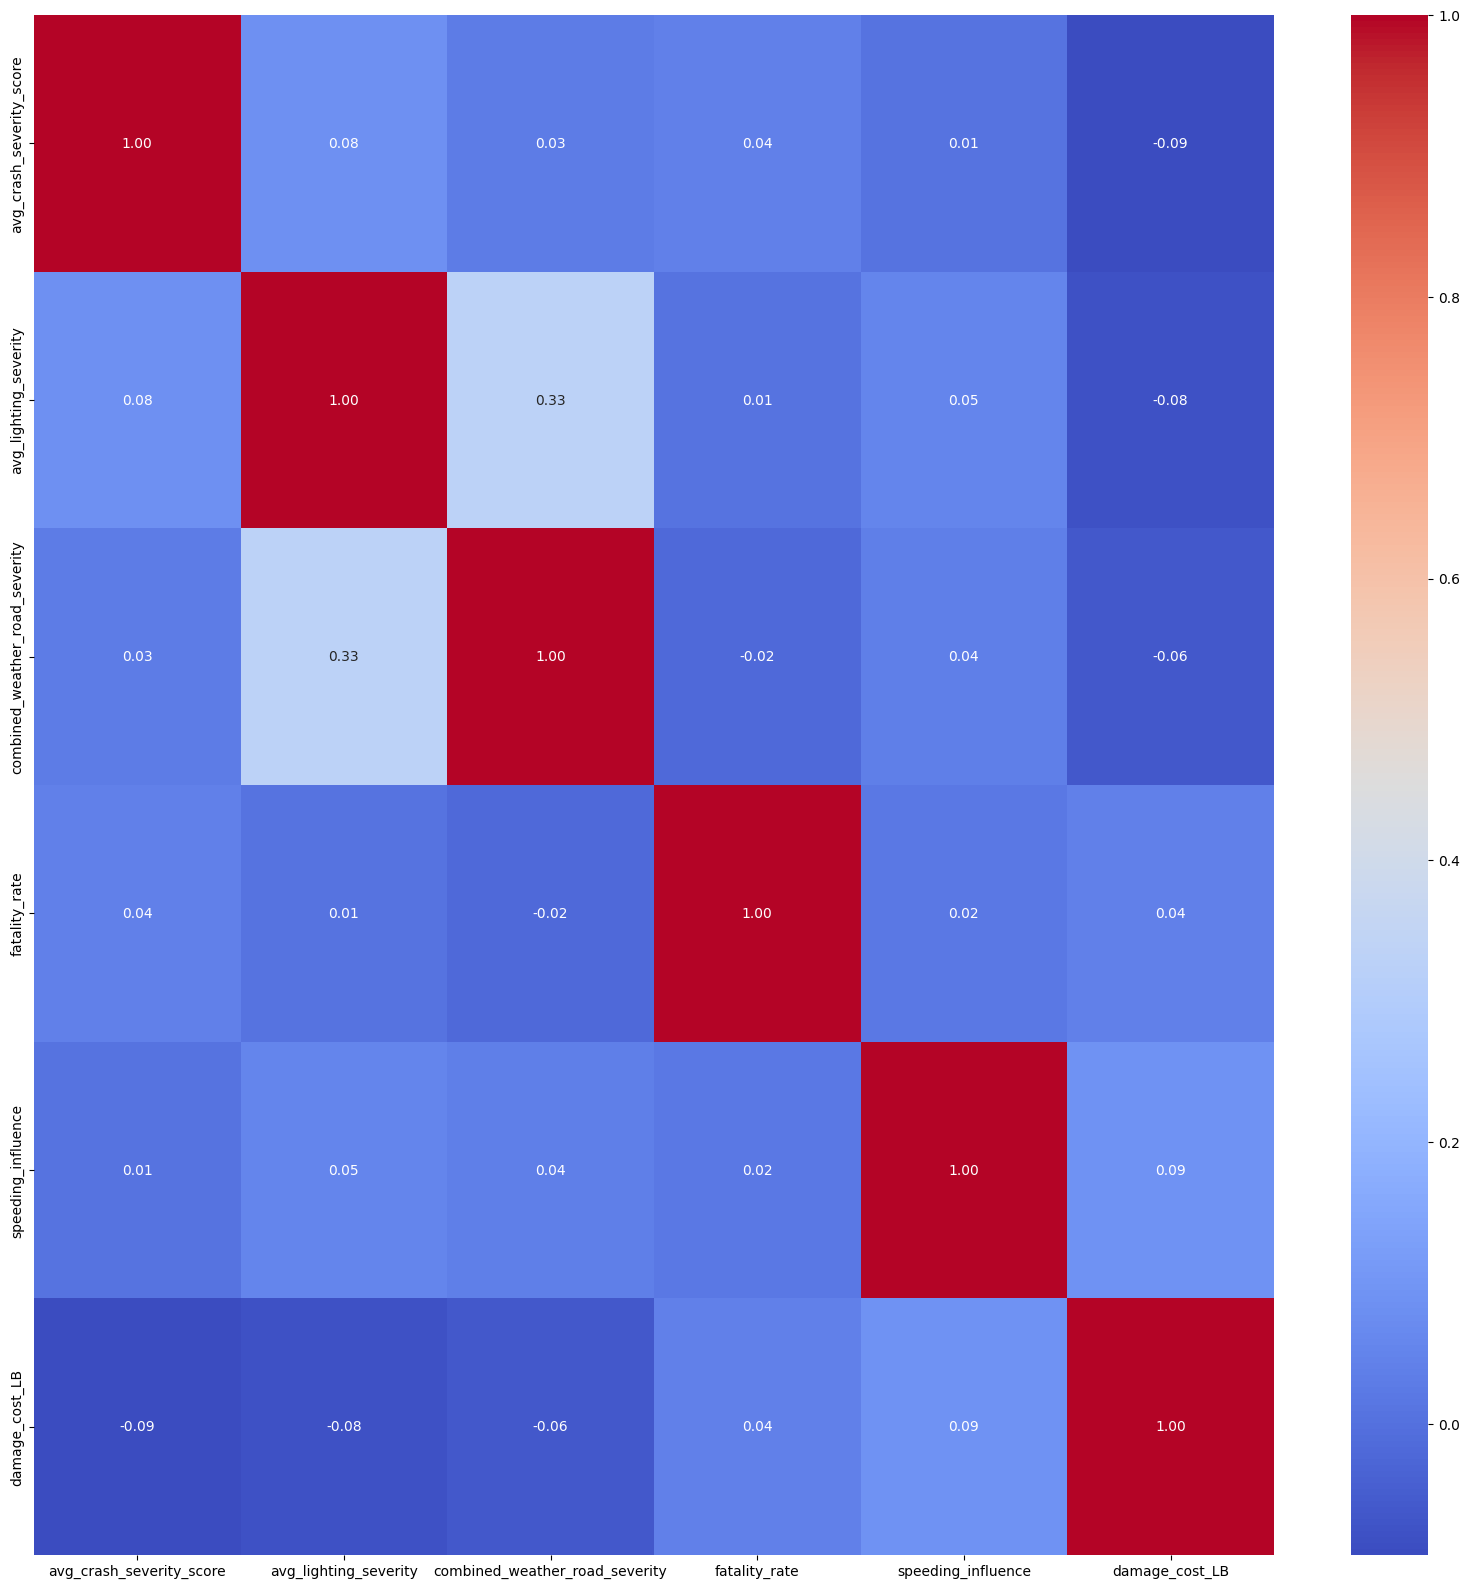

In [80]:
selected_features = ['avg_age', 'avg_weather_severity', 'fatality_rate', 'severe_injury_rate', 
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate']

selected_features = ['avg_crash_severity_score', 'avg_lighting_severity', 'combined_weather_road_severity', 'fatality_rate', 'speeding_influence', 'damage_cost_LB']
plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Some of them can be exchanged. Es. Damage_cost_LB with vehicle_involement_rate

In [81]:
#Possible features to use for validation 
validation_features = list(set(columns) - set(selected_features))
validation_features

['road_defect_crash_rate',
 'vehicle_involvement_rate',
 'damage_low',
 'injury_severity_score',
 'num_towed_units_LB',
 'avg_weather_severity',
 'adverse_weather_crash_rate',
 'damage_high',
 'avg_age',
 'weekend_crash_rate',
 'avg_responsibility_score',
 'damage_medium',
 'severe_injury_rate',
 'night_crash_rate',
 'senior_drivers',
 'total_crashes',
 'neo_patented_drivers',
 'avg_roadway_severity']

## Standard Scaler

In [82]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

avg_crash_severity_score  avg_lighting_severity  \
0                 -0.594719               0.440448   
1                  0.702175              -0.714096   
2                 -1.384838               0.246690   
3                  0.021122               0.232783   
4                 -0.388483              -0.290854   

   combined_weather_road_severity  fatality_rate  speeding_influence  \
0                        0.528371      -0.169046            0.421623   
1                       -0.628140      -0.169046            0.178818   
2                        0.039103      -0.169046            0.237913   
3                        0.726945      -0.169046            2.777173   
4                        0.737382      -0.169046           -0.599440   

   damage_cost_LB  
0        0.775171  
1       -0.255078  
2       -0.934107  
3        3.748847  
4        1.126393

### Visualize the data with a 2D PCA

C:\Users\giuli\AppData\Local\Temp\ipykernel_14412\2539881587.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')


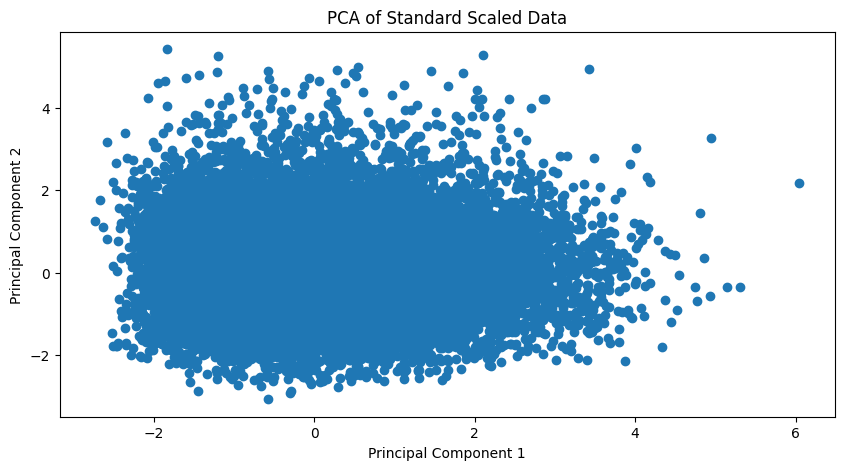

In [83]:
pca = PCA(n_components=2)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 3D PCA

C:\Users\giuli\AppData\Local\Temp\ipykernel_14412\3313555010.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')


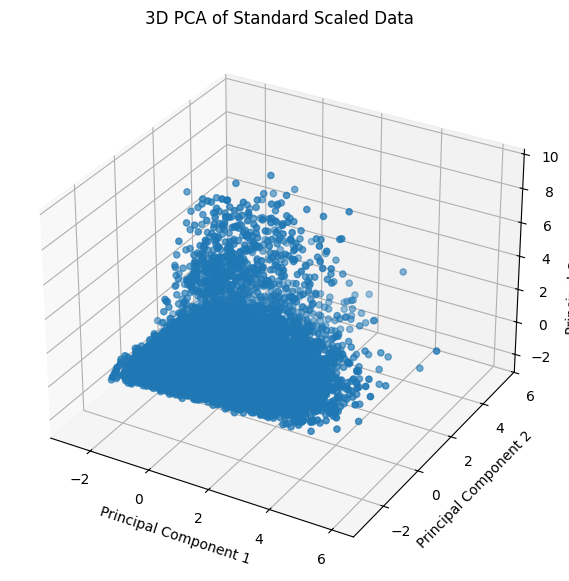

In [84]:
pca = PCA(n_components=3)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# Kmeans with Hierchical clustering to determine intial centroids

In [85]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

avg_crash_severity_score  avg_lighting_severity  \
0                 -0.594719               0.440448   
1                  0.702175              -0.714096   
2                 -1.384838               0.246690   
3                  0.021122               0.232783   
4                 -0.388483              -0.290854   

   combined_weather_road_severity  fatality_rate  speeding_influence  \
0                        0.528371      -0.169046            0.421623   
1                       -0.628140      -0.169046            0.178818   
2                        0.039103      -0.169046            0.237913   
3                        0.726945      -0.169046            2.777173   
4                        0.737382      -0.169046           -0.599440   

   damage_cost_LB  
0        0.775171  
1       -0.255078  
2       -0.934107  
3        3.748847  
4        1.126393

In [86]:
# use hierarchical clustering to determine the centroids of kmeans
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

data_dist = pdist(df_cluster_ss, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')

labels = fcluster(data_link, t=6, criterion='maxclust')
final_K=len(np.unique(labels))
centroids = np.array([df_cluster_ss[labels == i].mean(axis=0) for i in range(1, final_K + 1)])

In [87]:
final_K

6

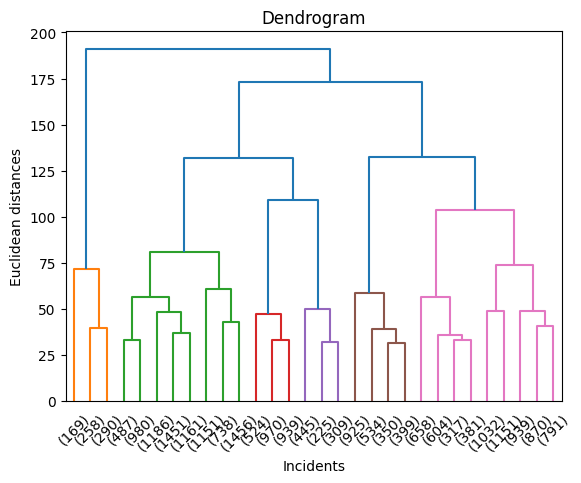

In [88]:
current_height = data_link[-(final_K - 1), 2]  
next_height = data_link[-final_K, 2] 
cut_height = (current_height + next_height) / 2 
dendro1 = dendrogram(data_link, color_threshold=cut_height, truncate_mode='lastp')

plt.title('Dendrogram')
plt.xlabel('Incidents')
plt.ylabel('Euclidean distances')
plt.show()

## Best Silhouette scores

In [89]:
kmeans = KMeans(n_clusters=final_K,init=centroids,n_init=1)
kmeans.fit(df_cluster_ss)
silhouette_score(df_cluster_ss, kmeans.labels_)


np.float64(0.20048545717705749)

### Separation with davies_bouldin_score (Lower value = better clustering)

In [90]:
print('Separation %s' % metrics.davies_bouldin_score(df_cluster_ss, kmeans.labels_)) 

Separation 1.263570779401073


In [91]:
df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

cluster
1    6904
2    4278
4    3849
5    3588
3    2510
0     561
Name: count, dtype: int64

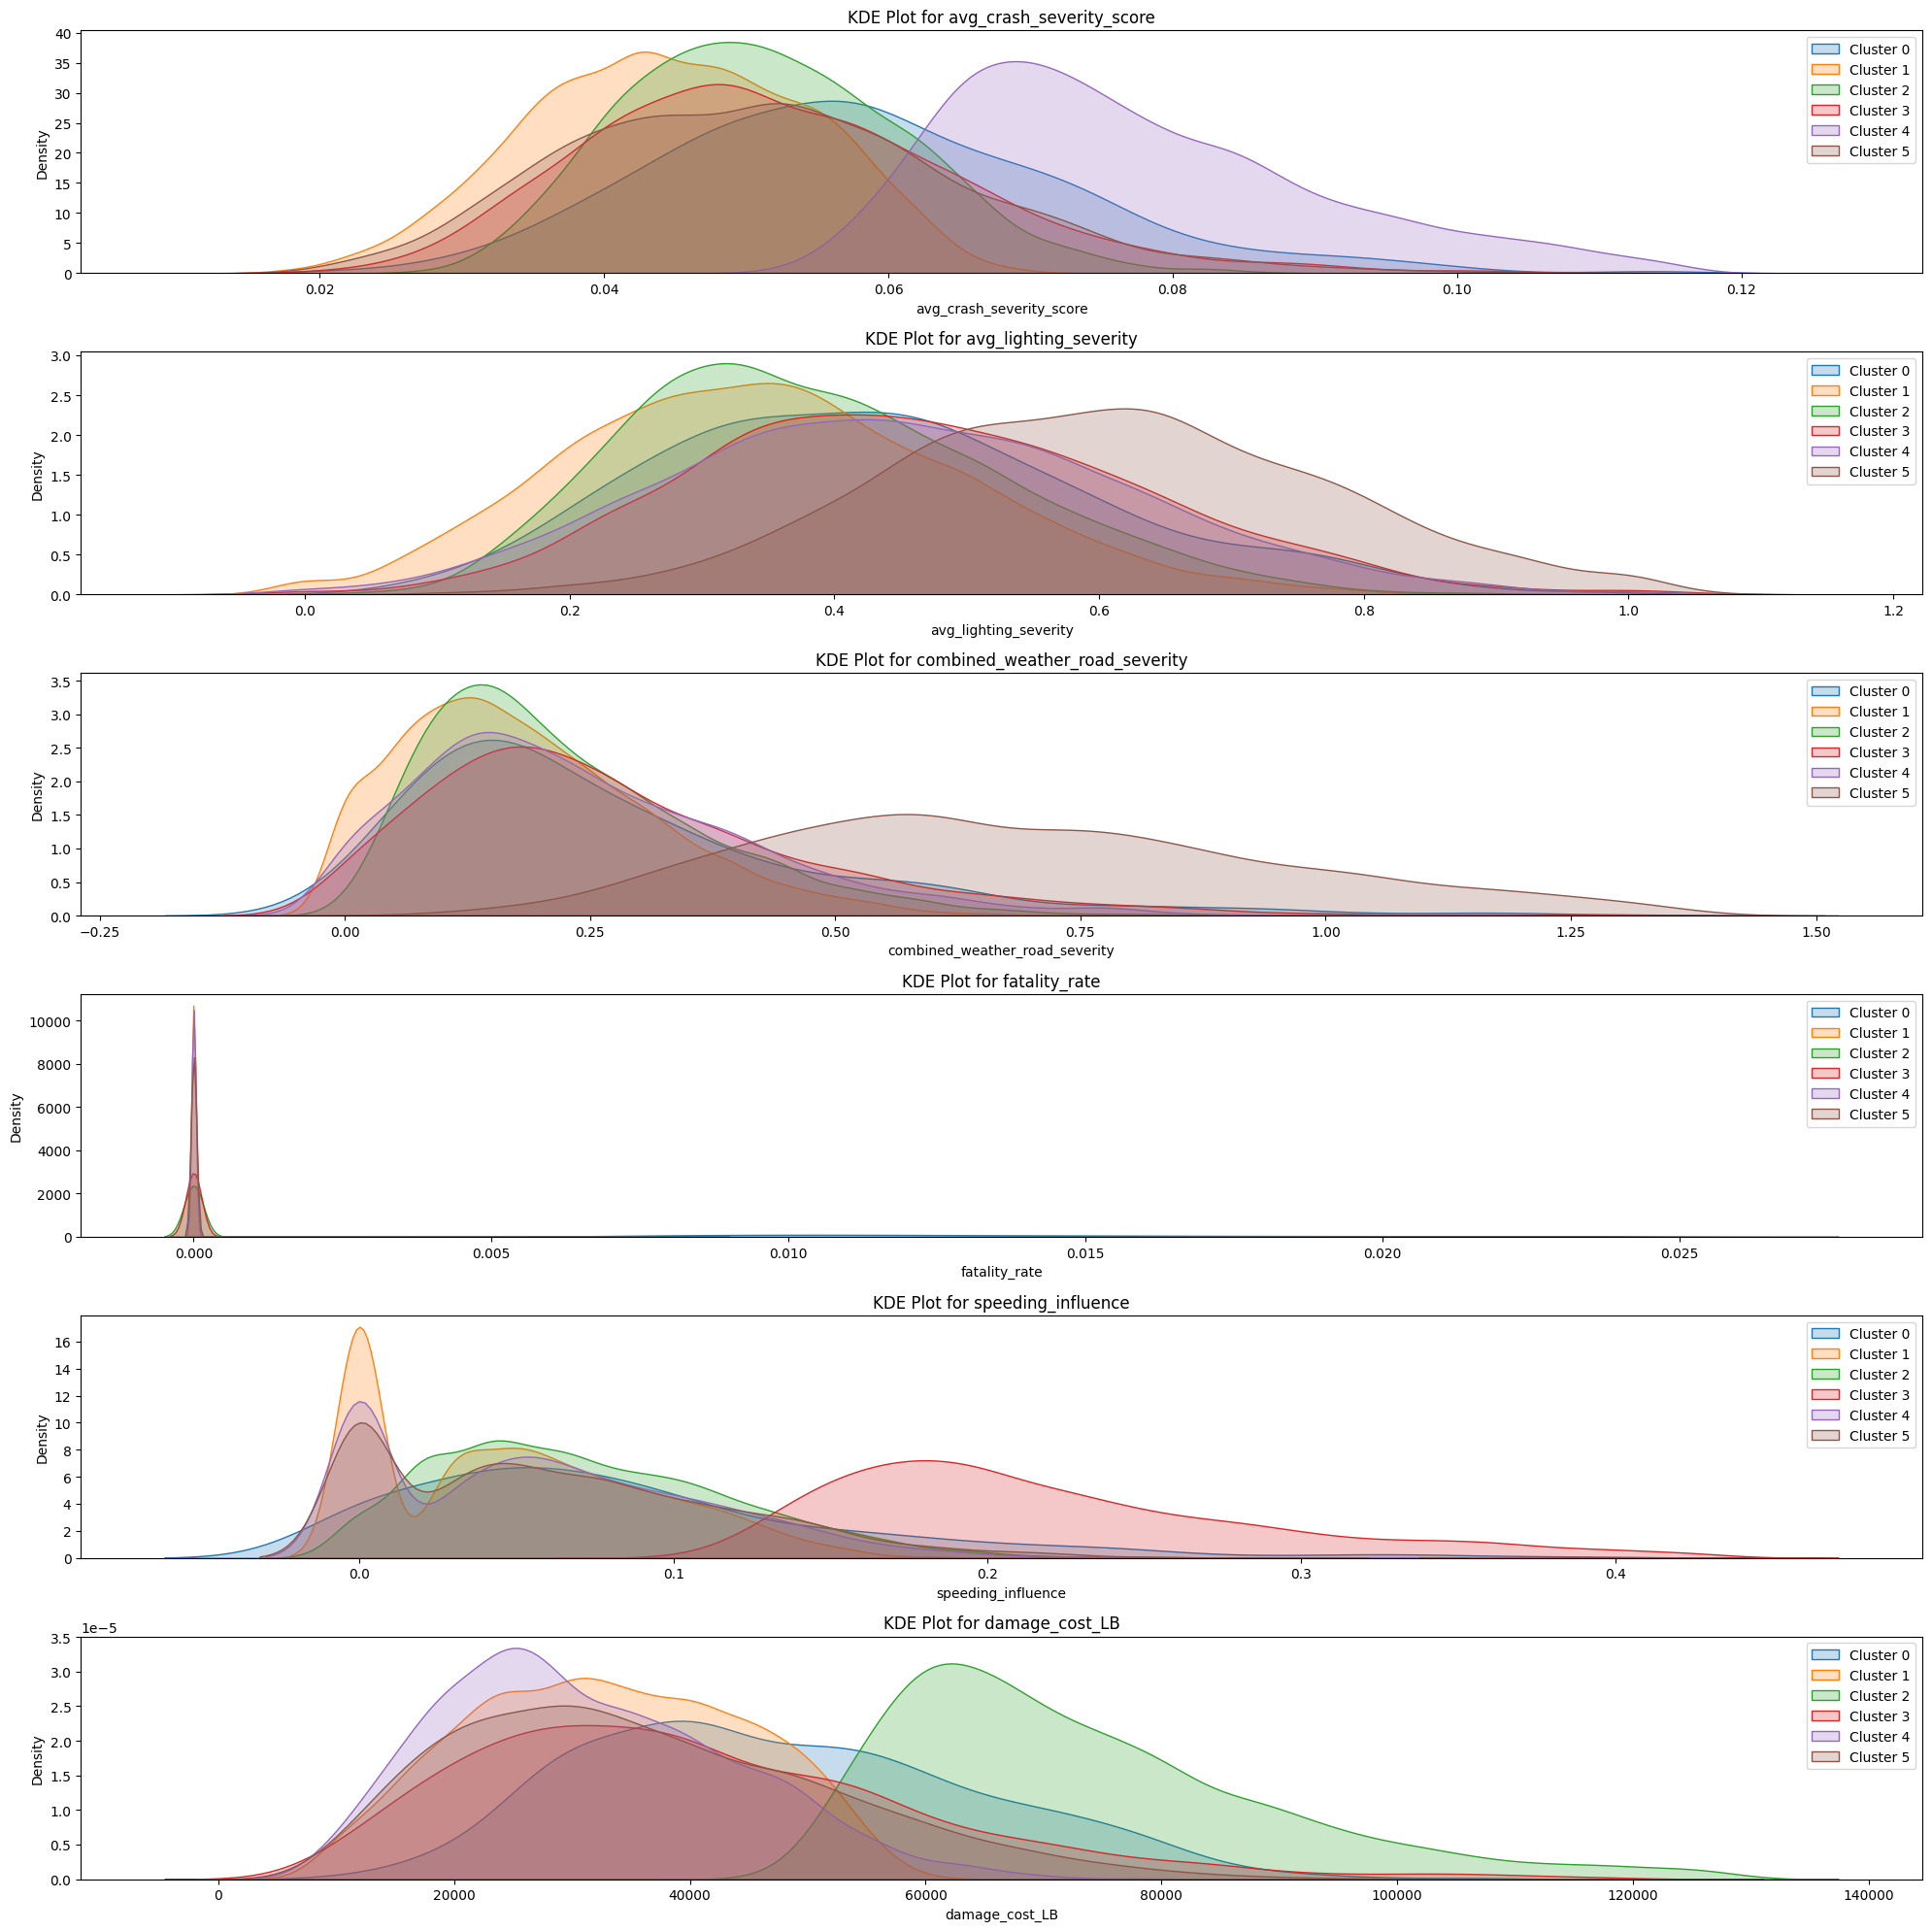

In [92]:
features = selected_features

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    for cluster in range(kmeans.n_clusters):
        sns.kdeplot(df[df['cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

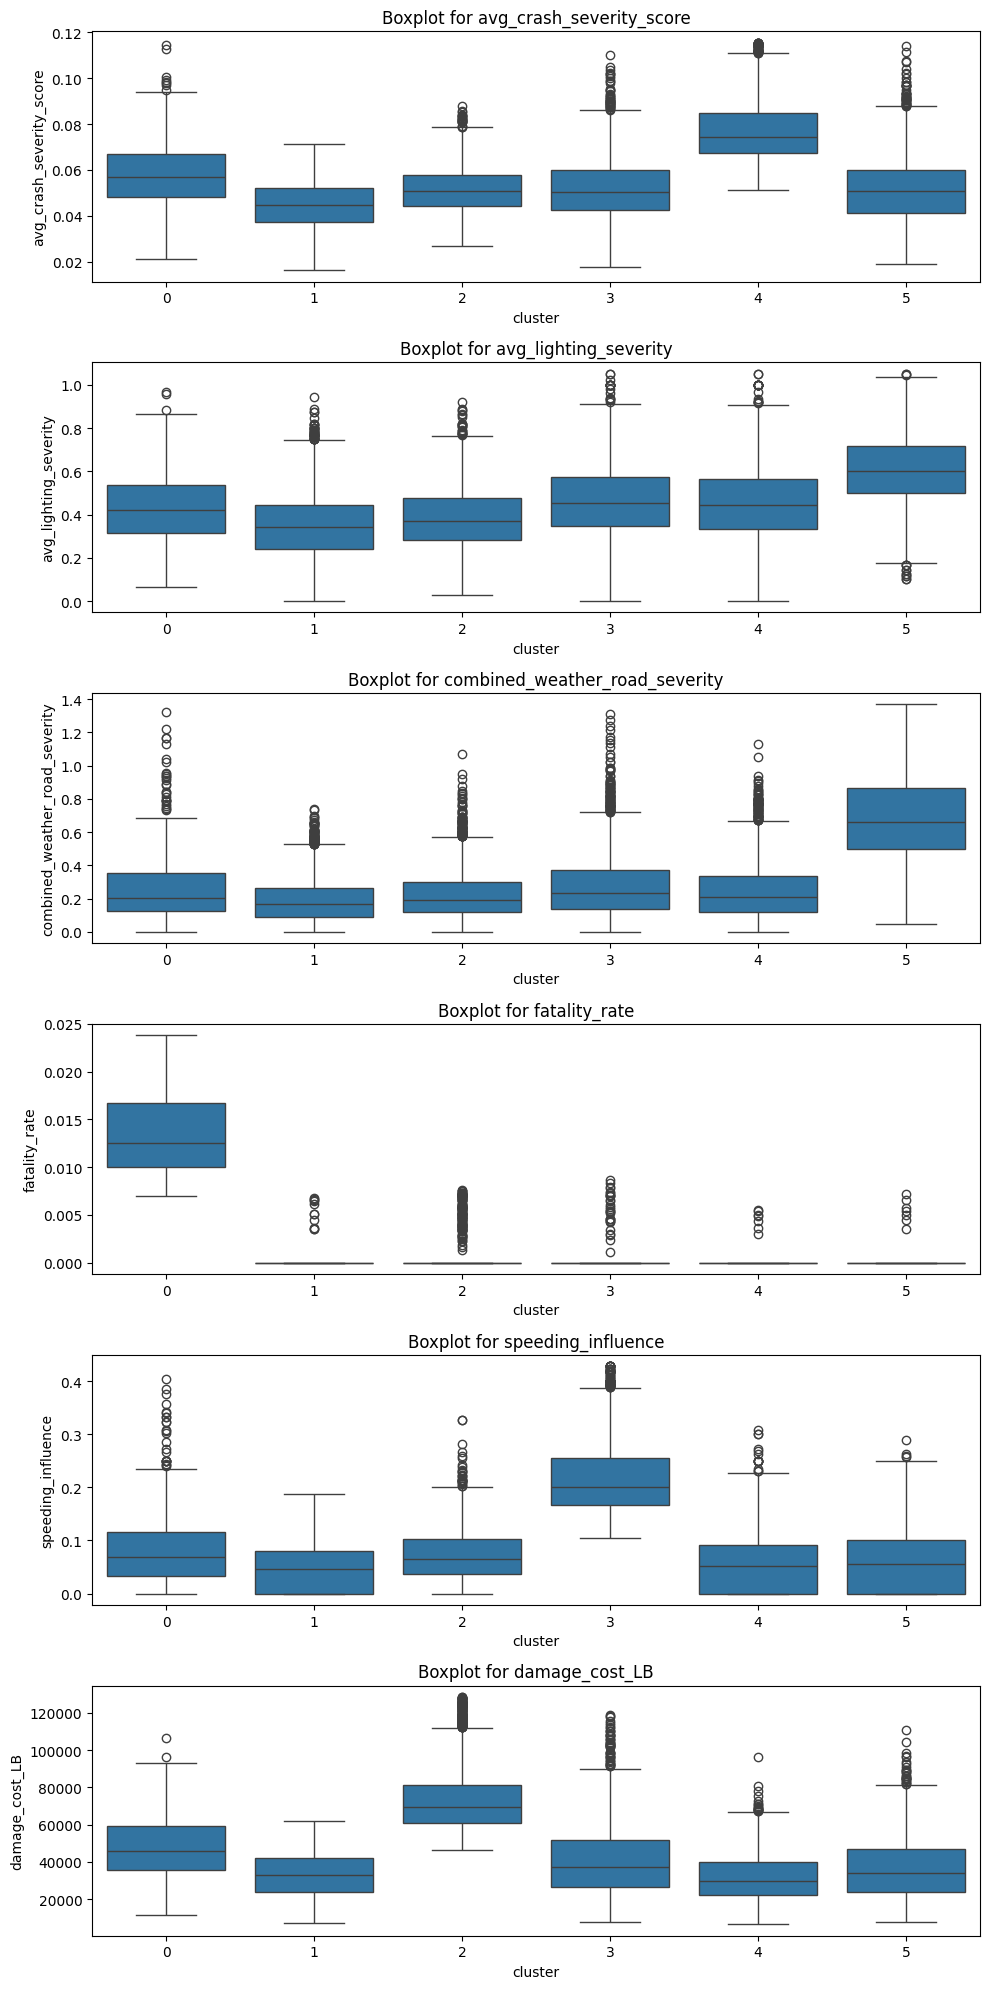

In [93]:
features = selected_features

plt.figure(figsize=(10, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

d:\- UNI\DM\project2\DM-Project2\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


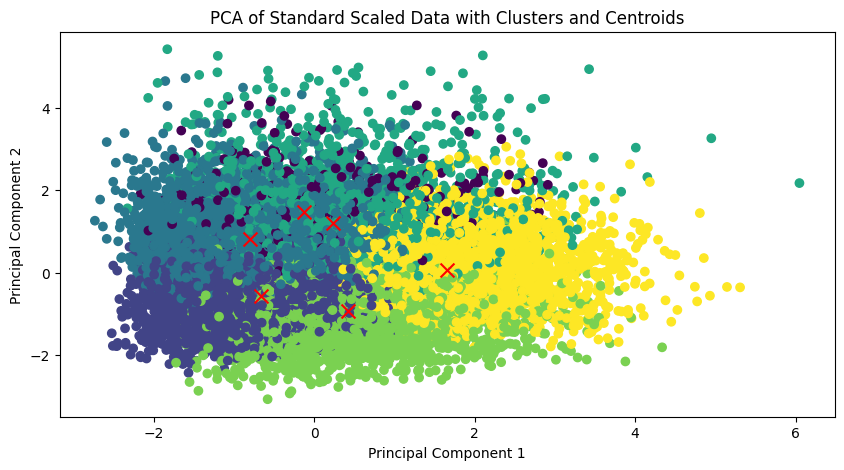

In [94]:
#show the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100)
plt.title('PCA of Standard Scaled Data with Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [95]:
def clusters_pairplot(df, centroids):
    pairplot = sns.pairplot(
        df,
        hue='cluster',
        palette='Set1',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.5}
    )

    for i, ax in enumerate(pairplot.axes.flat):
        # Get features for each subplot
        row_feature = pairplot.axes.flat[i].get_ylabel()
        col_feature = pairplot.axes.flat[i].get_xlabel()

        # Add centroids only to relevant scatter plots, excluding diagonal ones
        if row_feature in df.columns and col_feature in df.columns:
            ax.scatter(
                centroids[:, df.columns.get_loc(col_feature)],  
                centroids[:, df.columns.get_loc(row_feature)], 
                marker='x', s=100, c='black', label='Centroid'
            )

    plt.legend()
    plt.show()

C:\Users\giuli\AppData\Local\Temp\ipykernel_14412\773651732.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


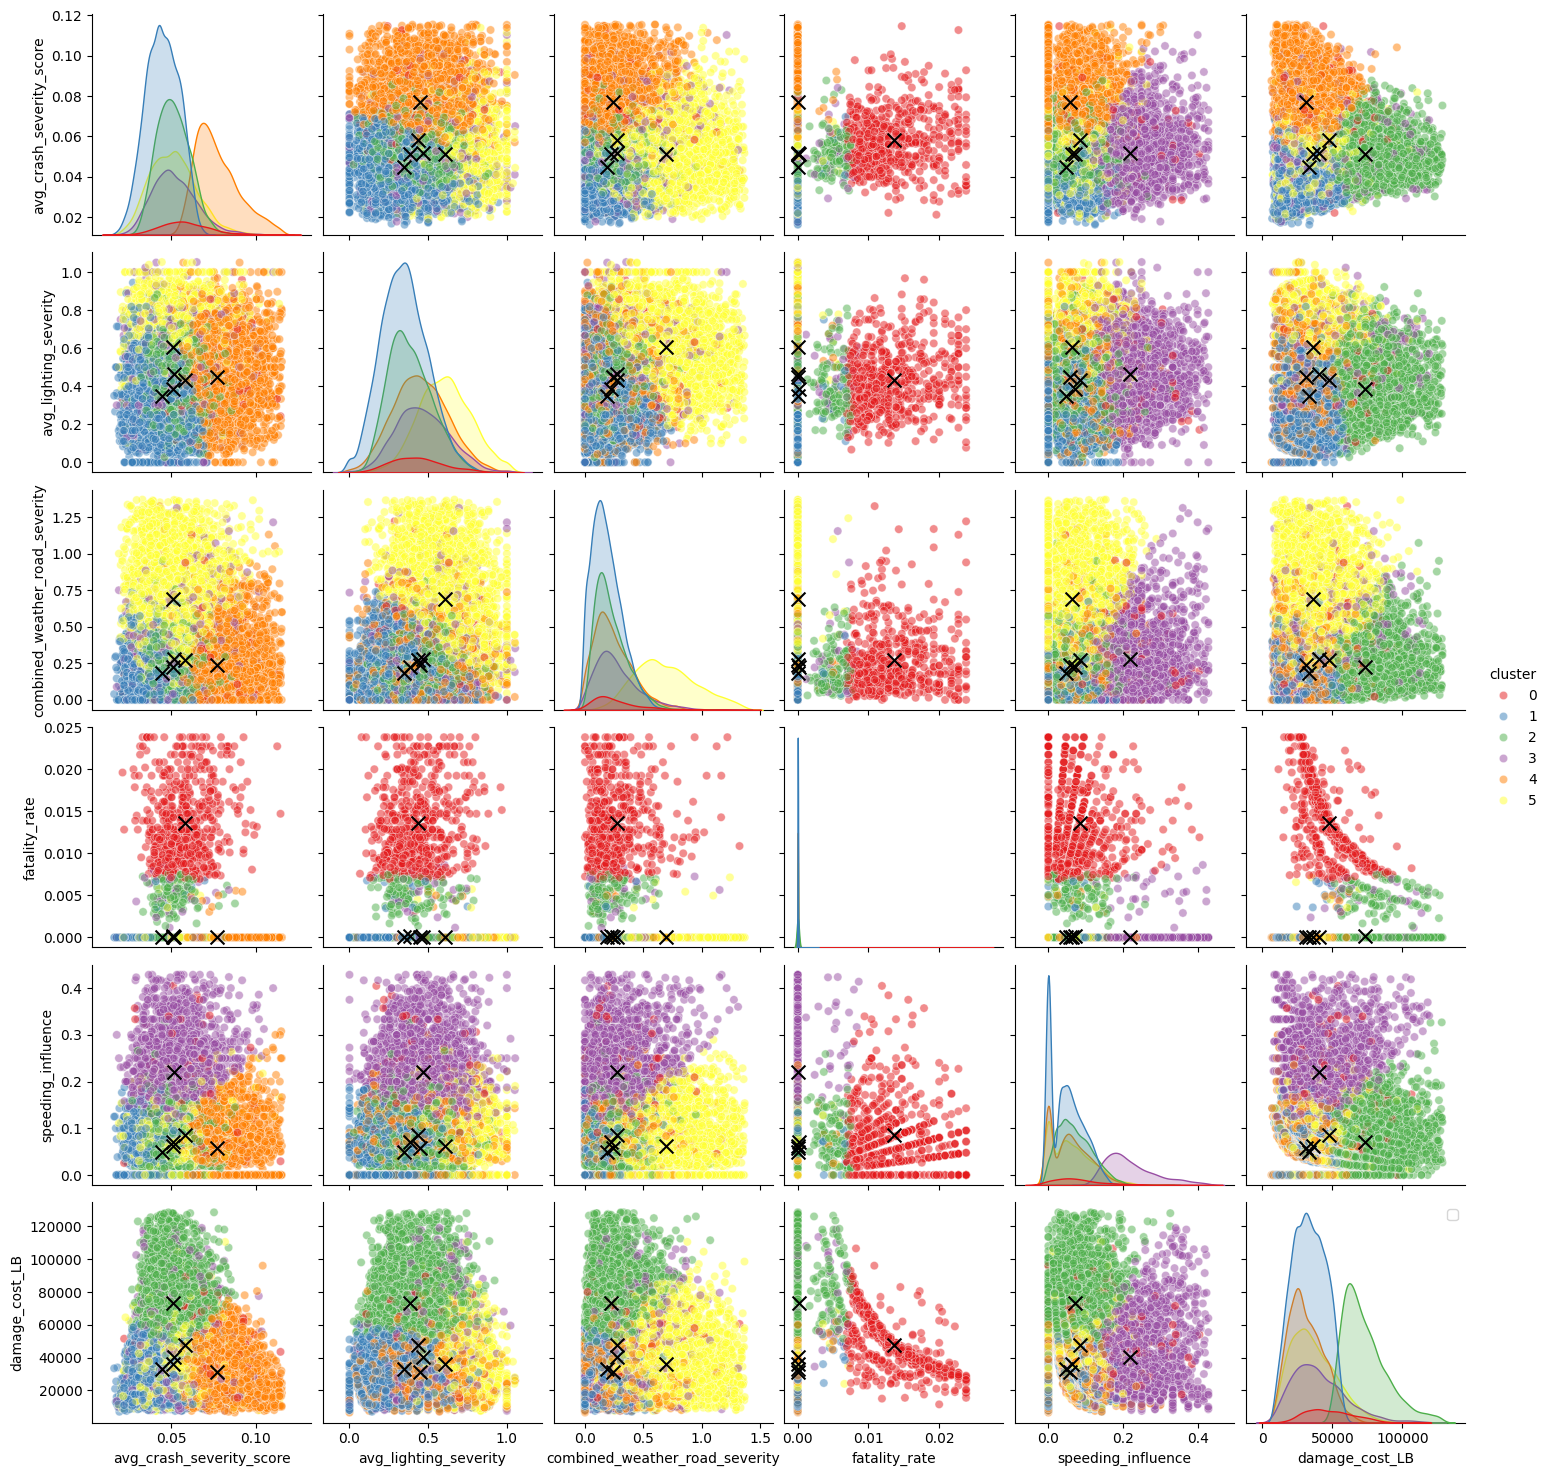

In [96]:
clusters_pairplot(df[selected_features + ['cluster']], scaler_ss.inverse_transform(centroids))

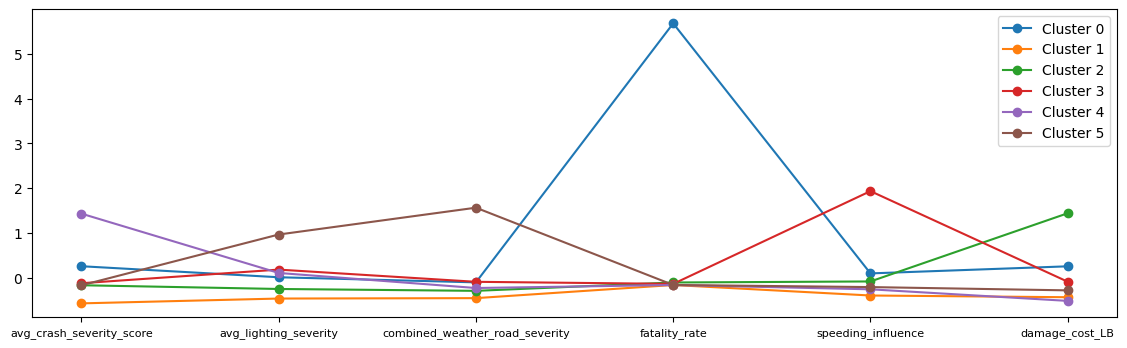

In [97]:
plt.figure(figsize=(14, 4))
for i in range(0, len(centroids)):
    plt.plot(centroids[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(selected_features)), selected_features, fontsize=8)
plt.legend(fontsize=10)
plt.show()

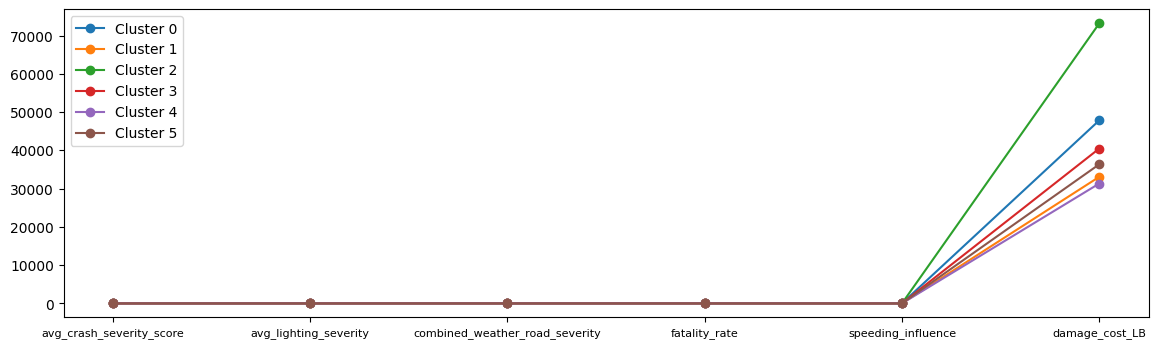

In [98]:
centroids_inverse = scaler_ss.inverse_transform(centroids)
plt.figure(figsize=(14, 4))
for i in range(0, len(centroids)):
    plt.plot(centroids_inverse[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(selected_features)), selected_features, fontsize=8)
plt.legend(fontsize=10)
plt.show()

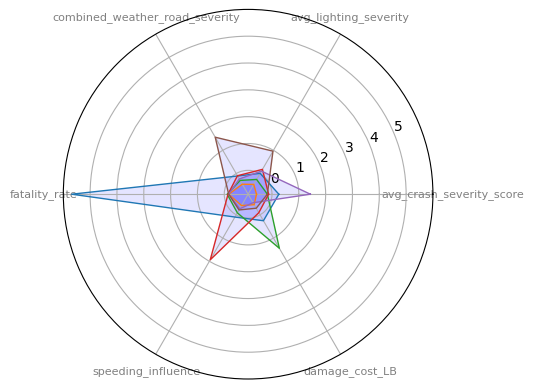

In [99]:
from math import pi
 
# number of variable
N = len(selected_features)
# compute the angle of each axis in the plot
for i in range(0, len(centroids)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroids[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], selected_features, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

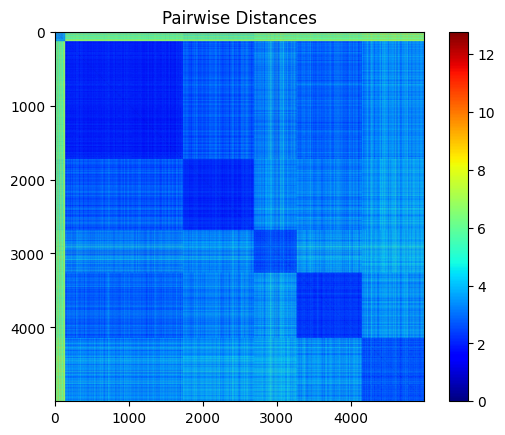

In [100]:
df_cluster_with_labels = df_cluster_ss.copy()
df_cluster_with_labels['cluster'] = kmeans.labels_

from sklearn.metrics import pairwise_distances
df_cluster_ss_subset = df_cluster_with_labels.sample(5000)
df_cluster_ss_subset = df_cluster_ss_subset.sort_values(by='cluster')
# compute the pairwise distances
distances = pairwise_distances(df_cluster_ss_subset[selected_features],metric='euclidean')

plt.imshow(distances, cmap ='jet')
plt.colorbar()
plt.title('Pairwise Distances')
plt.show()

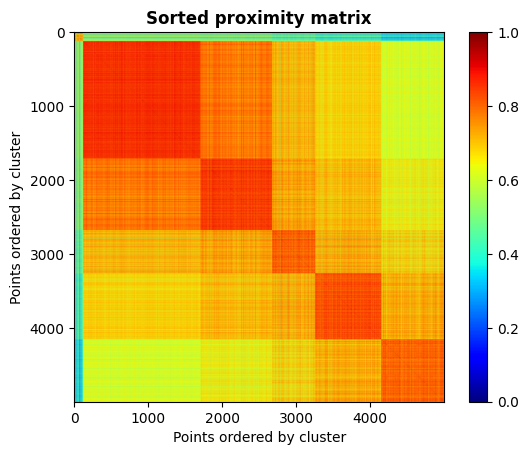

In [101]:
filtered_df = df_cluster_with_labels.sample(5000)
filtered_labels = filtered_df['cluster']
# Determine the pairwise distance matrix (using the Euclidean distance)
pairwise_distances_ = pairwise_distances(filtered_df, metric='euclidean')
# Cluster labels
n = len(filtered_labels)
# Sorting by labels
sorted_pairwisedist = pairwise_distances_[np.argsort(filtered_labels)][:, np.argsort(filtered_labels)]
# Keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1 - sorted_pairwisedist / np.max(sorted_pairwisedist)
plt.title("Sorted proximity matrix", fontweight='bold')
plt.xlabel("Points ordered by cluster")
plt.ylabel("Points ordered by cluster")
plt.imshow(sorted_similarity, cmap='jet')
plt.colorbar()
plt.show()

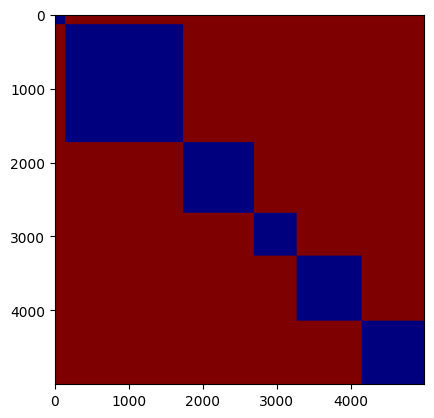

In [102]:
# The optimal distance matrix has 0 if the two points are in the same cluster, 1 otherwise
optimal_distances = np.ones(distances.shape)
# locate the indices of the points in the same cluster
same_cluster_indices = np.where(
    df_cluster_ss_subset['cluster'].values.reshape(-1,1) 
    == df_cluster_ss_subset['cluster'].values.reshape(1,-1)
)
# set the optimal distance to 0
optimal_distances[same_cluster_indices] = 0

plt.imshow(optimal_distances, cmap='jet')
plt.grid(False)

In [103]:
np.corrcoef(distances.reshape(-1), optimal_distances.reshape(-1))

array([[1.        , 0.39063139],
       [0.39063139, 1.        ]])

## External features

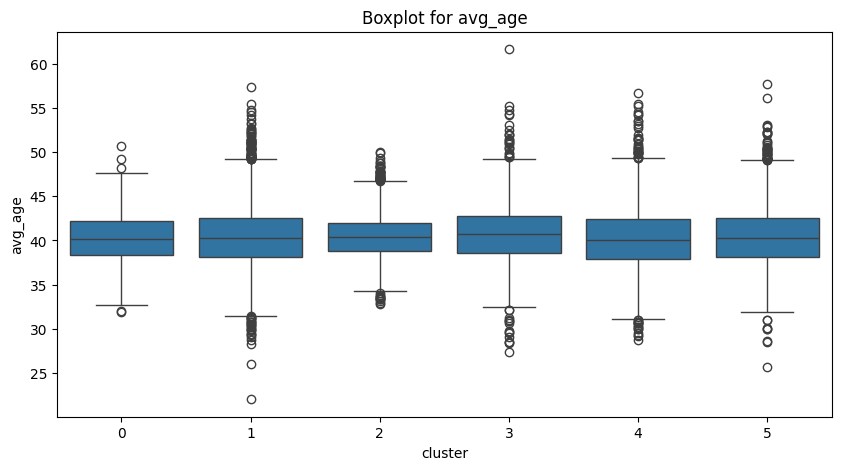

In [104]:
#boxplot with "avg_age"
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='avg_age', data=df)
plt.title('Boxplot for avg_age')
plt.show()


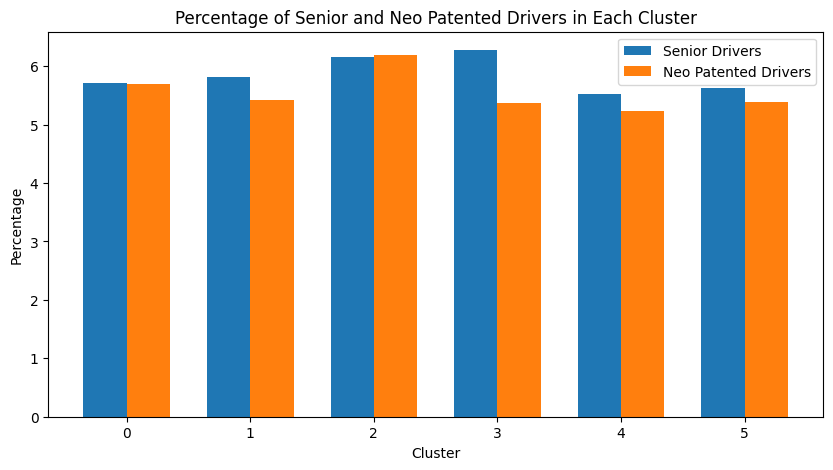

In [105]:
# Sum of senior drivers
groupped_senior = df.groupby('cluster')['senior_drivers'].sum().reset_index()
total_drivers = df.groupby('cluster')['total_drivers'].sum().reset_index()

# Percentage of senior drivers
groupped_senior = pd.merge(groupped_senior, total_drivers, on='cluster')
groupped_senior['senior_drivers_percentage'] = groupped_senior['senior_drivers'] / groupped_senior['total_drivers'] * 100

# Sum of neo patented drivers
groupped_neo = df.groupby('cluster')['neo_patented_drivers'].sum().reset_index()

# Percentage of neo patented drivers
groupped_neo = pd.merge(groupped_neo, total_drivers, on='cluster')
groupped_neo['neo_patented_drivers_percentage'] = groupped_neo['neo_patented_drivers'] / groupped_neo['total_drivers'] * 100

# Merge the dataframes
merged_df = pd.merge(groupped_senior[['cluster', 'senior_drivers_percentage']], 
                     groupped_neo[['cluster', 'neo_patented_drivers_percentage']], 
                     on='cluster')

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(merged_df))

bar1 = plt.bar(index, merged_df['senior_drivers_percentage'], bar_width, label='Senior Drivers')
bar2 = plt.bar(index + bar_width, merged_df['neo_patented_drivers_percentage'], bar_width, label='Neo Patented Drivers')

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Senior and Neo Patented Drivers in Each Cluster')
plt.xticks(index + bar_width / 2, merged_df['cluster'])
plt.legend()

plt.show()


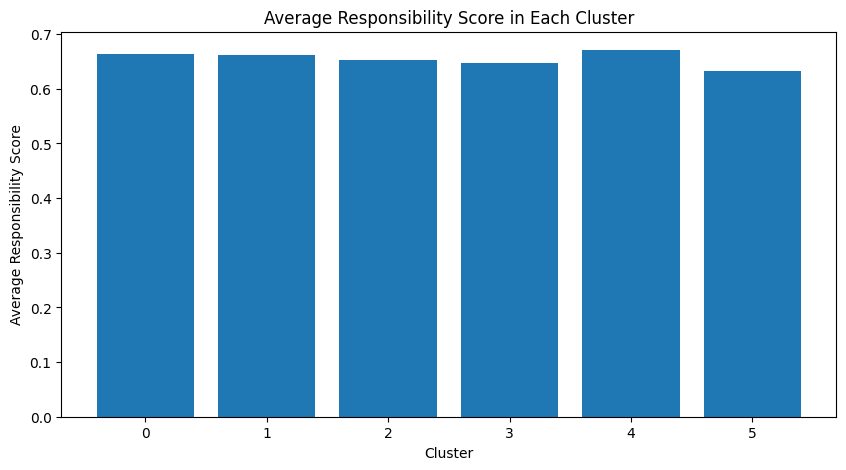

In [106]:
#mean of average_responsability_score
groupped_responsability = df.groupby('cluster')['avg_responsibility_score'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(groupped_responsability['cluster'], groupped_responsability['avg_responsibility_score'])
plt.xlabel('Cluster')
plt.ylabel('Average Responsibility Score')
plt.title('Average Responsibility Score in Each Cluster')
plt.show()


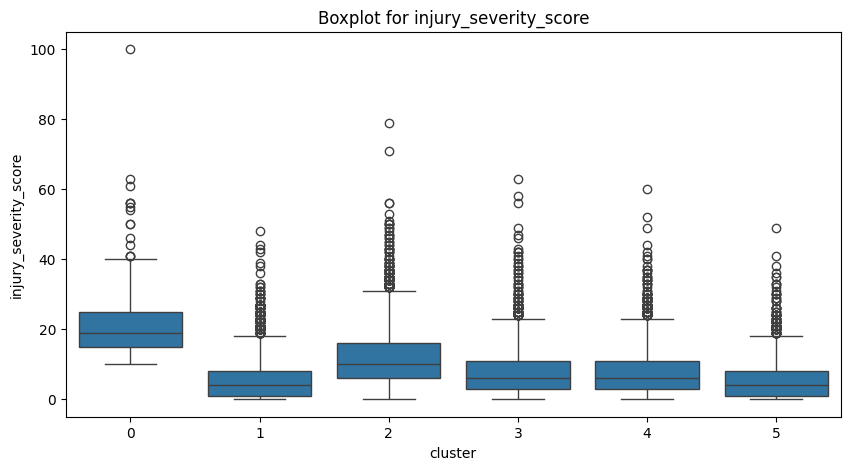

In [107]:
#box plot for injury_severity_score
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='injury_severity_score', data=df)
plt.title('Boxplot for injury_severity_score')
plt.show()


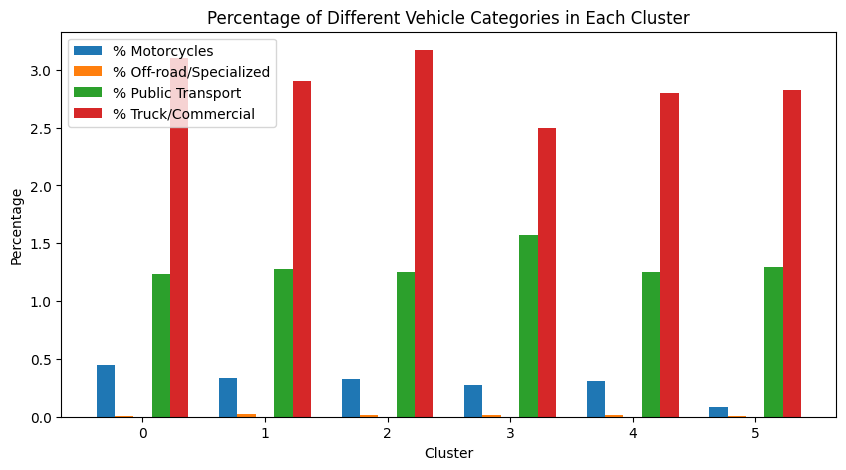

In [108]:
# Sum of motorcycles
sum_category_motorcycle = df.groupby('cluster')['sum_category_motorcycle'].sum().reset_index()
total_vehicles = df.groupby('cluster')['total_units_department'].sum().reset_index()

# Percentage of motorcycles
sum_category_motorcycle['category_motorcycle_percentage'] = sum_category_motorcycle['sum_category_motorcycle'] / total_vehicles['total_units_department'] * 100

# Sum of off-road/specialized vehicles
groupped_neo = df.groupby('cluster')['sum_category_off-road/specialized'].sum().reset_index()

# Percentage of off-road/specialized vehicles
groupped_neo['category_off-road/specialized_perc'] = groupped_neo['sum_category_off-road/specialized'] / total_vehicles['total_units_department'] * 100

# Sum of passenger vehicles
groupped_passenger = df.groupby('cluster')['sum_category_passenger vehicle'].sum().reset_index()

# Percentage of passenger vehicles
groupped_passenger['sum_category_passenger vehicle_perc'] = groupped_passenger['sum_category_passenger vehicle'] / total_vehicles['total_units_department'] * 100

# Sum of public transport vehicles
groupped_public_transport = df.groupby('cluster')['sum_category_public transport'].sum().reset_index()

# Percentage of public transport vehicles
groupped_public_transport['category_public_transport_perc'] = groupped_public_transport['sum_category_public transport'] / total_vehicles['total_units_department'] * 100

# Sum of truck/commercial vehicles
groupped_truck_commercial = df.groupby('cluster')['sum_category_truck/commercial'].sum().reset_index()

# Percentage of truck/commercial vehicles
groupped_truck_commercial['category_truck_commercial_perc'] = groupped_truck_commercial['sum_category_truck/commercial'] / total_vehicles['total_units_department'] * 100

# Merge the dataframes
merged_df = pd.merge(sum_category_motorcycle[['cluster', 'category_motorcycle_percentage']], 
                     groupped_neo[['cluster', 'category_off-road/specialized_perc']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_passenger[['cluster', 'sum_category_passenger vehicle_perc']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_public_transport[['cluster', 'category_public_transport_perc']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_truck_commercial[['cluster', 'category_truck_commercial_perc']], 
                     on='cluster')

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.15
index = np.arange(len(merged_df))

bar1 = plt.bar(index, merged_df['category_motorcycle_percentage'], bar_width, label='% Motorcycles')
bar2 = plt.bar(index + bar_width, merged_df['category_off-road/specialized_perc'], bar_width, label="% Off-road/Specialized")
#bar3 = plt.bar(index + 2 * bar_width, merged_df['sum_category_passenger vehicle_perc'], bar_width, label="% Passenger")
bar4 = plt.bar(index + 3 * bar_width, merged_df['category_public_transport_perc'], bar_width, label="% Public Transport")
bar5 = plt.bar(index + 4 * bar_width, merged_df['category_truck_commercial_perc'], bar_width, label="% Truck/Commercial")

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Different Vehicle Categories in Each Cluster')
plt.xticks(index + 2 * bar_width, merged_df['cluster'])
plt.legend()

plt.show()

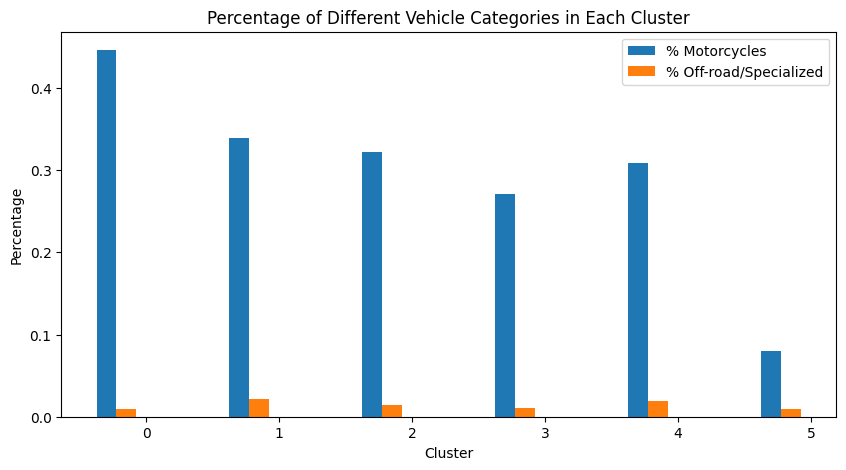

In [109]:
# Sum of motorcycles
sum_category_motorcycle = df.groupby('cluster')['sum_category_motorcycle'].sum().reset_index()
total_vehicles = df.groupby('cluster')['total_units_department'].sum().reset_index()

# Percentage of motorcycles
sum_category_motorcycle['category_motorcycle_percentage'] = sum_category_motorcycle['sum_category_motorcycle'] / total_vehicles['total_units_department'] * 100

# Sum of off-road/specialized vehicles
groupped_neo = df.groupby('cluster')['sum_category_off-road/specialized'].sum().reset_index()

# Percentage of off-road/specialized vehicles
groupped_neo['category_off-road/specialized_perc'] = groupped_neo['sum_category_off-road/specialized'] / total_vehicles['total_units_department'] * 100

# Sum of passenger vehicles
groupped_passenger = df.groupby('cluster')['sum_category_passenger vehicle'].sum().reset_index()

# Percentage of passenger vehicles
groupped_passenger['sum_category_passenger vehicle_perc'] = groupped_passenger['sum_category_passenger vehicle'] / total_vehicles['total_units_department'] * 100

# Sum of public transport vehicles
groupped_public_transport = df.groupby('cluster')['sum_category_public transport'].sum().reset_index()

# Percentage of public transport vehicles
groupped_public_transport['category_public_transport_perc'] = groupped_public_transport['sum_category_public transport'] / total_vehicles['total_units_department'] * 100

# Sum of truck/commercial vehicles
groupped_truck_commercial = df.groupby('cluster')['sum_category_truck/commercial'].sum().reset_index()

# Percentage of truck/commercial vehicles
groupped_truck_commercial['category_truck_commercial_perc'] = groupped_truck_commercial['sum_category_truck/commercial'] / total_vehicles['total_units_department'] * 100

# Merge the dataframes
merged_df = pd.merge(sum_category_motorcycle[['cluster', 'category_motorcycle_percentage']], 
                     groupped_neo[['cluster', 'category_off-road/specialized_perc']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_passenger[['cluster', 'sum_category_passenger vehicle_perc']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_public_transport[['cluster', 'category_public_transport_perc']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_truck_commercial[['cluster', 'category_truck_commercial_perc']], 
                     on='cluster')

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.15
index = np.arange(len(merged_df))

bar1 = plt.bar(index, merged_df['category_motorcycle_percentage'], bar_width, label='% Motorcycles')
bar2 = plt.bar(index + bar_width, merged_df['category_off-road/specialized_perc'], bar_width, label="% Off-road/Specialized")
#bar3 = plt.bar(index + 2 * bar_width, merged_df['sum_category_passenger vehicle_perc'], bar_width, label="% Passenger")
#bar4 = plt.bar(index + 3 * bar_width, merged_df['category_public_transport_perc'], bar_width, label="% Public Transport")
#bar5 = plt.bar(index + 4 * bar_width, merged_df['category_truck_commercial_perc'], bar_width, label="% Truck/Commercial")

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Different Vehicle Categories in Each Cluster')
plt.xticks(index + 2 * bar_width, merged_df['cluster'])
plt.legend()

plt.show()

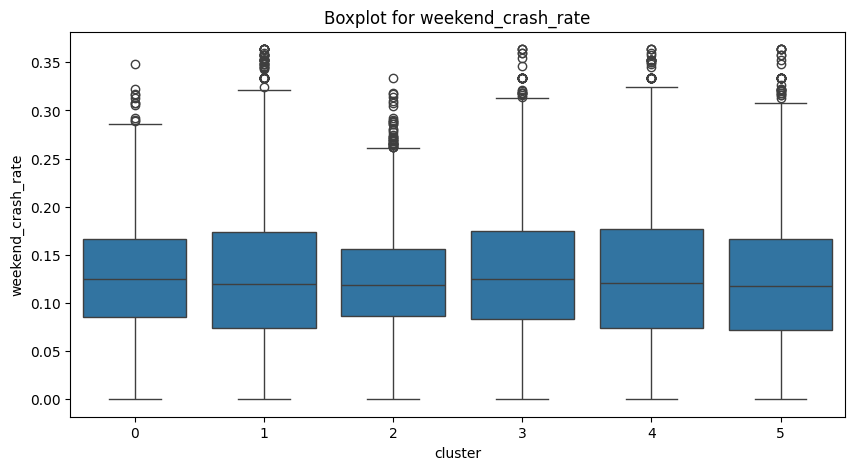

In [110]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='weekend_crash_rate', data=df)
plt.title('Boxplot for weekend_crash_rate')
plt.show()

In [111]:
features_to_test = [
 'road_defect_crash_rate',
 'num_towed_units_LB',
 'vehicle_involvement_rate',
 'night_crash_rate',
 'injury_severity_score',
 'weekend_crash_rate',
 'avg_weather_severity',
 'severe_injury_rate',
 'adverse_weather_crash_rate',
 'avg_roadway_severity']

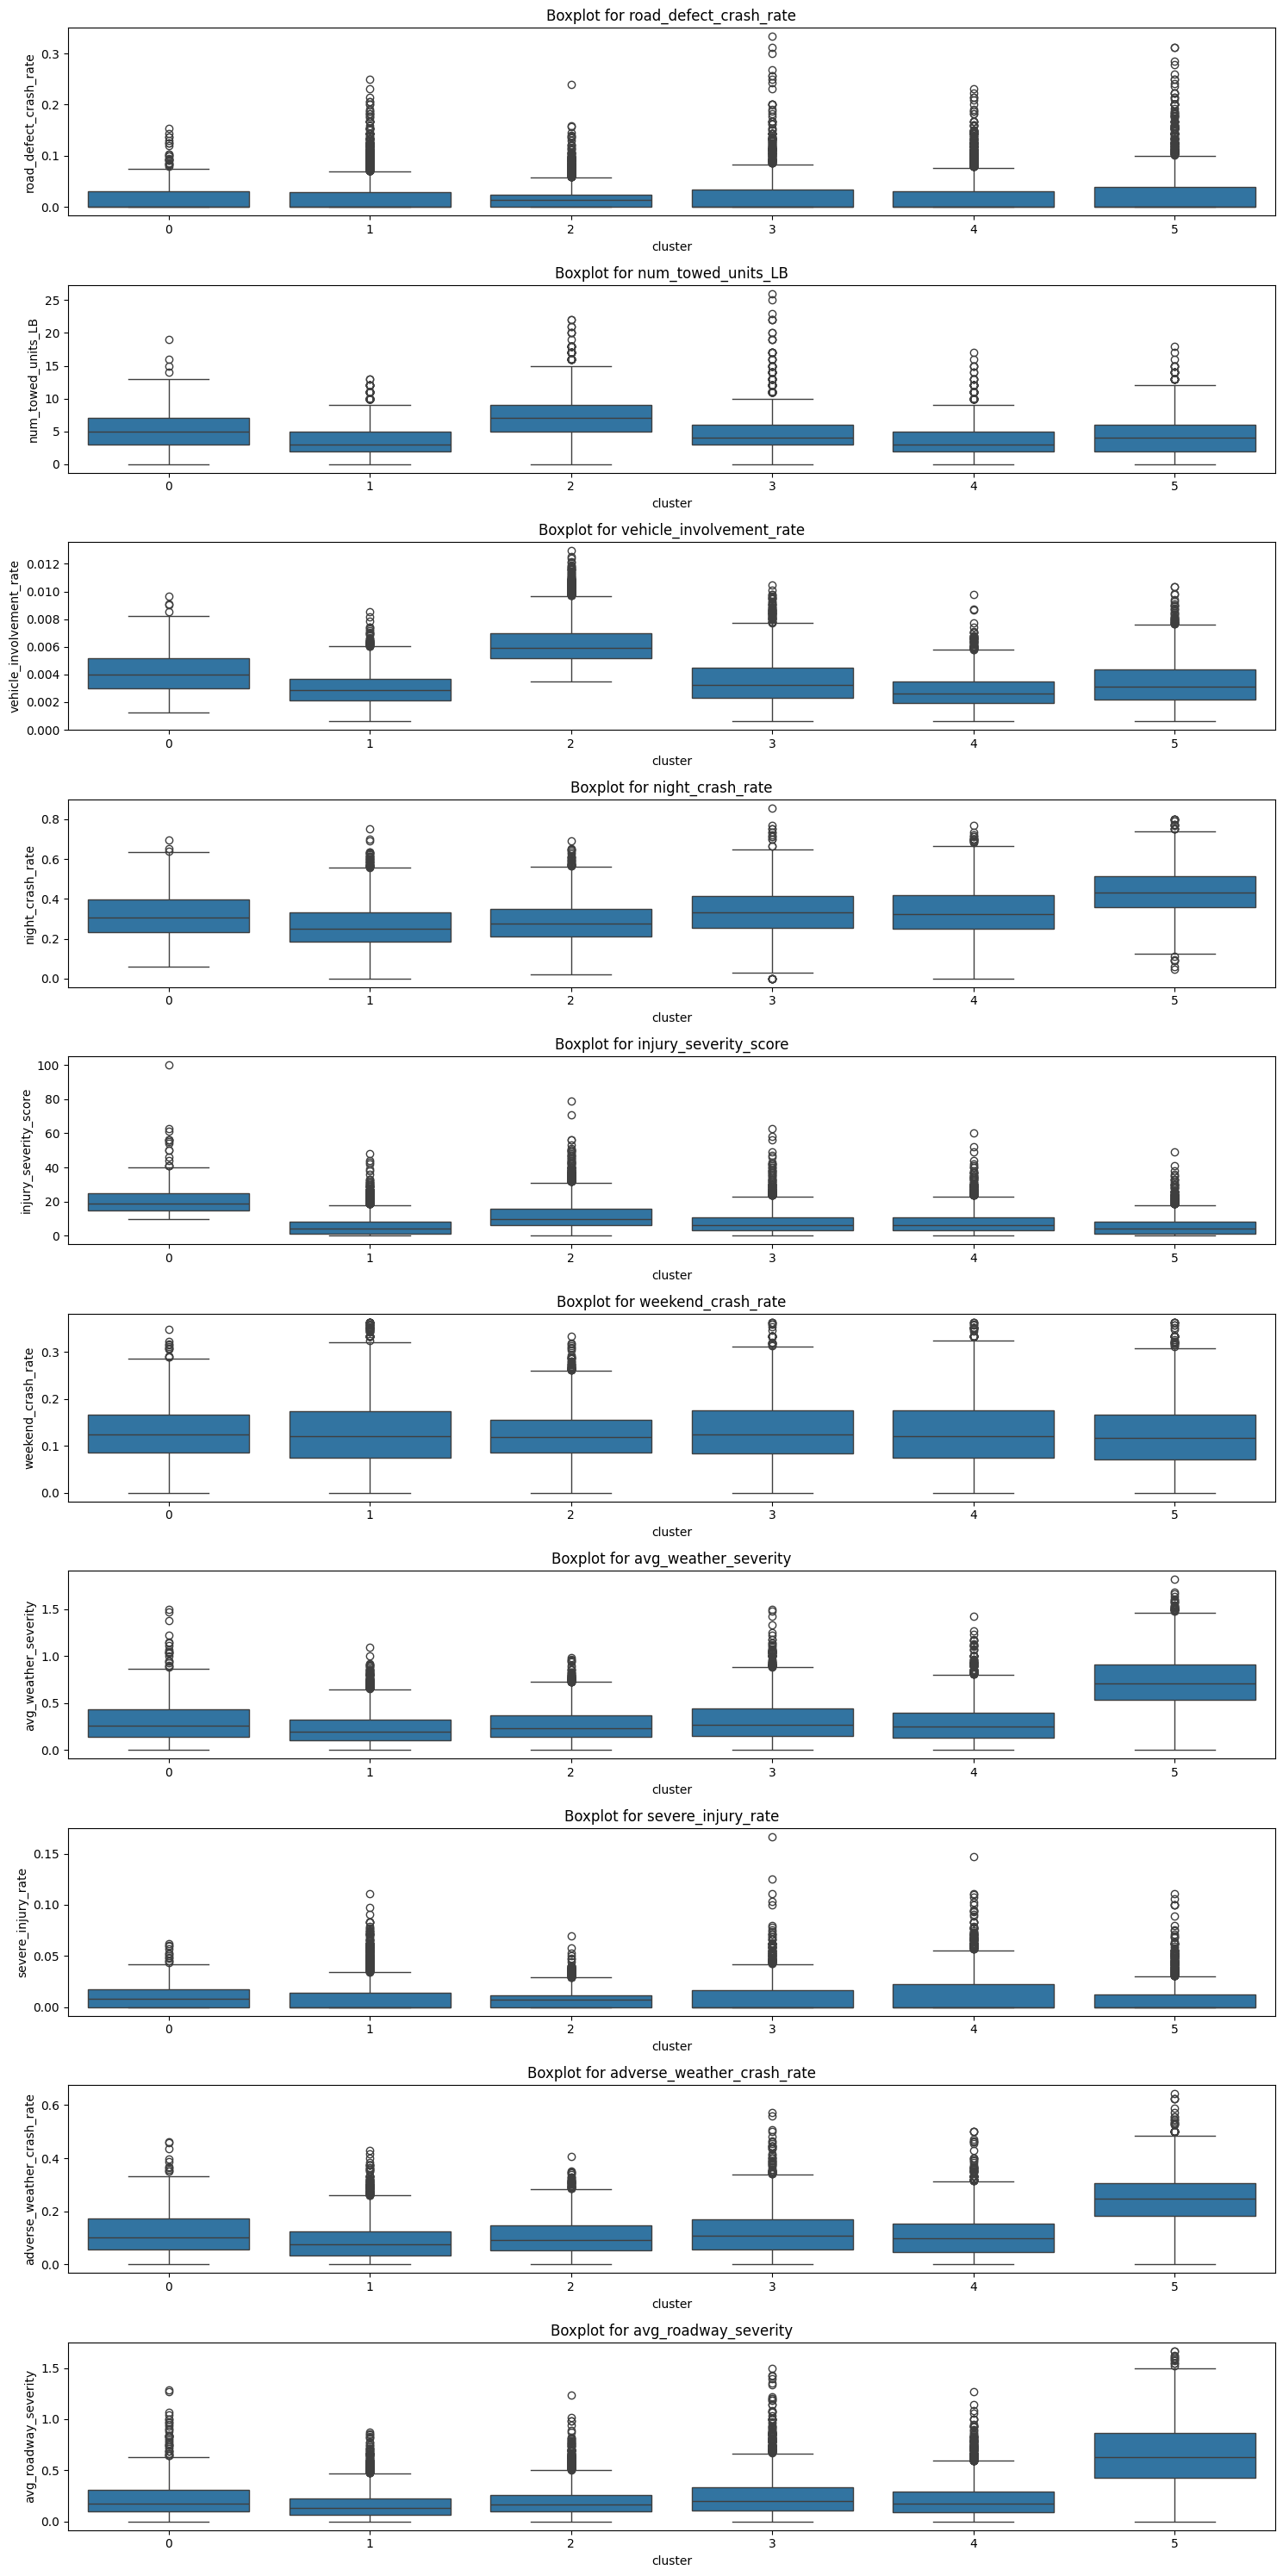

In [112]:
#box plots for all the validation_features
plt.figure(figsize=(15, 30))
for i, feature in enumerate(features_to_test):
    plt.subplot(len(features_to_test), 1, i+1)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()


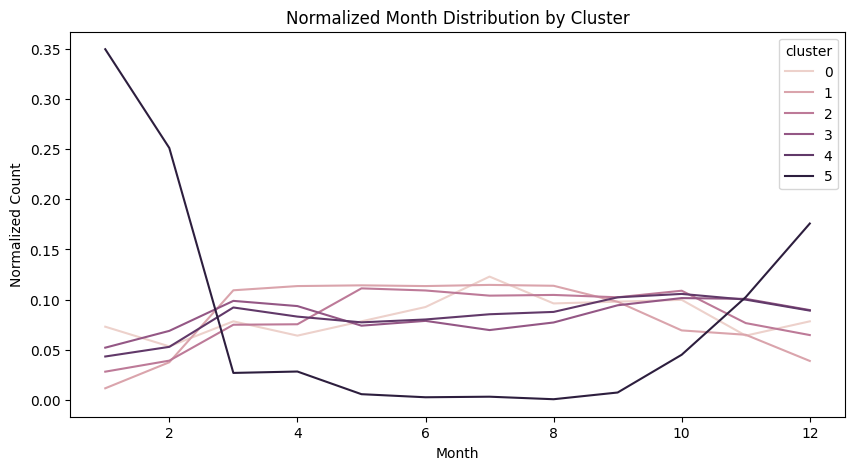

In [113]:
# Month distribution by cluster
month_df = df.groupby(['cluster', 'CRASH_MONTH']).size().reset_index(name='count')

# Normalize by the number of elements in each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
month_df['normalized_count'] = month_df.apply(lambda row: row['count'] / cluster_sizes[row['cluster']], axis=1)

plt.figure(figsize=(10, 5))
sns.lineplot(x='CRASH_MONTH', y='normalized_count', hue='cluster', data=month_df)
plt.title('Normalized Month Distribution by Cluster')
plt.xlabel('Month')
plt.ylabel('Normalized Count')
plt.show()

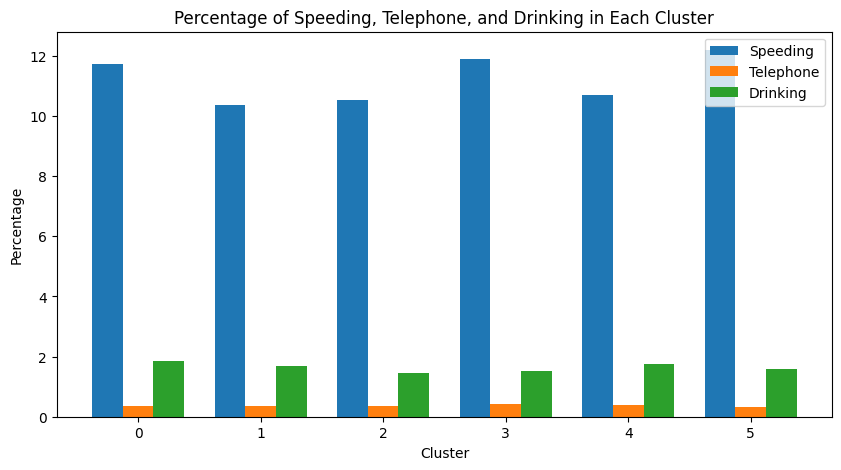

In [114]:
# Sum of speeding
groupped_speeding = df.groupby('cluster')['sum_speeding'].sum().reset_index()
total_crashes = df.groupby('cluster')['total_crashes'].sum().reset_index()

# Percentage of speeding
groupped_speeding = pd.merge(groupped_speeding, total_crashes, on='cluster')
groupped_speeding['speeding_percentage'] = groupped_speeding['sum_speeding'] / groupped_speeding['total_crashes'] * 100

# Sum of telephone
groupped_telephone = df.groupby('cluster')['sum_telephone'].sum().reset_index()

# Percentage of telephone
groupped_telephone = pd.merge(groupped_telephone, total_crashes, on='cluster')
groupped_telephone['telephone_percentage'] = groupped_telephone['sum_telephone'] / groupped_telephone['total_crashes'] * 100

# Sum of drinking
groupped_drinking = df.groupby('cluster')['sum_drinking'].sum().reset_index()

# Percentage of drinking
groupped_drinking = pd.merge(groupped_drinking, total_crashes, on='cluster')
groupped_drinking['drinking_percentage'] = groupped_drinking['sum_drinking'] / groupped_drinking['total_crashes'] * 100

# Merge the dataframes
merged_df = pd.merge(groupped_speeding[['cluster', 'speeding_percentage']], 
                     groupped_telephone[['cluster', 'telephone_percentage']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_drinking[['cluster', 'drinking_percentage']], 
                     on='cluster')

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.25
index = np.arange(len(merged_df))

bar1 = plt.bar(index, merged_df['speeding_percentage'], bar_width, label='Speeding')
bar2 = plt.bar(index + bar_width, merged_df['telephone_percentage'], bar_width, label='Telephone')
bar3 = plt.bar(index + 2 * bar_width, merged_df['drinking_percentage'], bar_width, label='Drinking')

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Speeding, Telephone, and Drinking in Each Cluster')
plt.xticks(index + bar_width, merged_df['cluster'])
plt.legend()

plt.show()

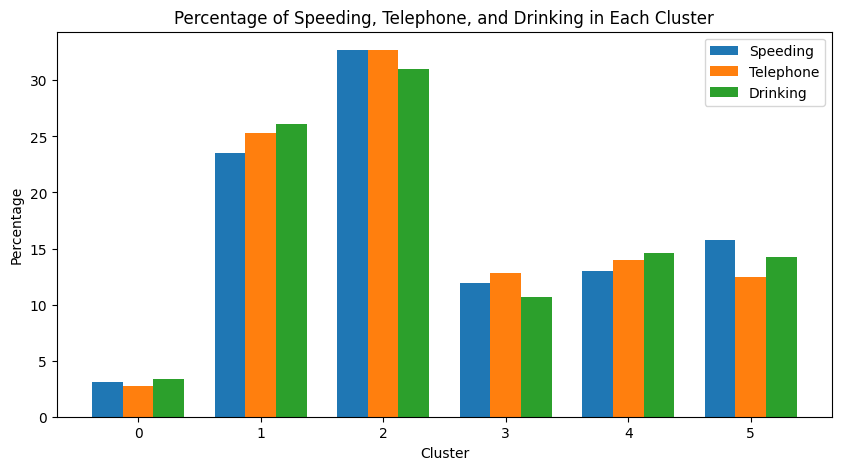

In [115]:
speed_total = df['sum_speeding'].sum()
speed_total

telephone_total = df['sum_telephone'].sum()
telephone_total

drinking_total = df['sum_drinking'].sum()
drinking_total

# Sum of speeding
groupped_speeding = df.groupby('cluster')['sum_speeding'].sum().reset_index()
total_crashes = df.groupby('cluster')['total_crashes'].sum().reset_index()

# Percentage of speeding
groupped_speeding = pd.merge(groupped_speeding, total_crashes, on='cluster')
groupped_speeding['speeding_percentage'] = groupped_speeding['sum_speeding'] / speed_total * 100

# Sum of telephone
groupped_telephone = df.groupby('cluster')['sum_telephone'].sum().reset_index()

# Percentage of telephone
groupped_telephone = pd.merge(groupped_telephone, total_crashes, on='cluster')
groupped_telephone['telephone_percentage'] = groupped_telephone['sum_telephone'] / telephone_total * 100

# Sum of drinking
groupped_drinking = df.groupby('cluster')['sum_drinking'].sum().reset_index()

# Percentage of drinking
groupped_drinking = pd.merge(groupped_drinking, total_crashes, on='cluster')
groupped_drinking['drinking_percentage'] = groupped_drinking['sum_drinking'] / drinking_total * 100

# Merge the dataframes
merged_df = pd.merge(groupped_speeding[['cluster', 'speeding_percentage']], 
                     groupped_telephone[['cluster', 'telephone_percentage']], 
                     on='cluster')
merged_df = pd.merge(merged_df, 
                     groupped_drinking[['cluster', 'drinking_percentage']], 
                     on='cluster')

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.25
index = np.arange(len(merged_df))

bar1 = plt.bar(index, merged_df['speeding_percentage'], bar_width, label='Speeding')
bar2 = plt.bar(index + bar_width, merged_df['telephone_percentage'], bar_width, label='Telephone')
bar3 = plt.bar(index + 2 * bar_width, merged_df['drinking_percentage'], bar_width, label='Drinking')

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Speeding, Telephone, and Drinking in Each Cluster')
plt.xticks(index + bar_width, merged_df['cluster'])
plt.legend()

plt.show()

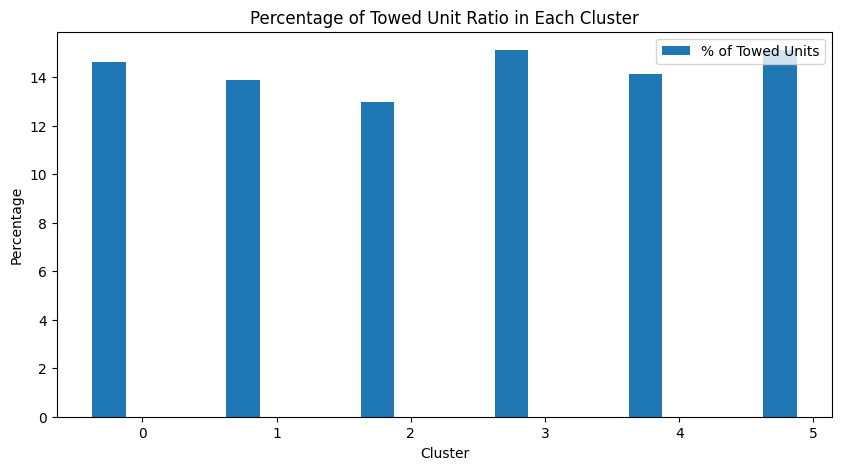

In [116]:
# % towed_unit_ratio
groupped_towed_unit_ratio = df.groupby('cluster')['num_towed_units_LB'].sum().reset_index()
total_crashes = df.groupby('cluster')['total_crashes'].sum().reset_index()

groupped_towed_unit_ratio['towed_unit_perc'] = groupped_towed_unit_ratio['num_towed_units_LB'] / total_crashes['total_crashes'] * 100

#plot
plt.figure(figsize=(10, 5))
bar_width = 0.25
index = np.arange(len(groupped_towed_unit_ratio))

bar1 = plt.bar(index, groupped_towed_unit_ratio['towed_unit_perc'], bar_width, label='% of Towed Units')

plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Towed Unit Ratio in Each Cluster')
plt.xticks(index + bar_width, groupped_towed_unit_ratio['cluster'])
plt.legend()

                     



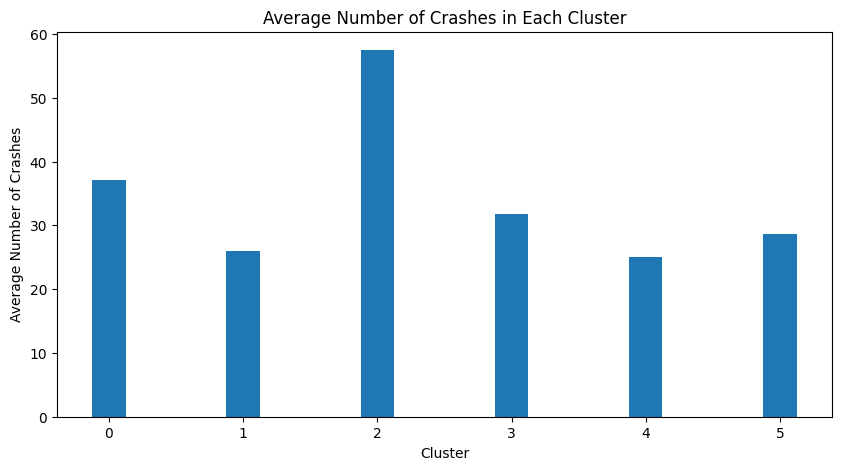

In [117]:
#avg number of crashes by cluster
groupped_crashes = df.groupby('cluster')['total_crashes'].mean().reset_index()

#plot
plt.figure(figsize=(10, 5))
bar_width = 0.25
index = np.arange(len(groupped_crashes))

bar1 = plt.bar(index, groupped_crashes['total_crashes'], bar_width, label='Average Number of Crashes')

plt.xlabel('Cluster')
plt.ylabel('Average Number of Crashes')
plt.title('Average Number of Crashes in Each Cluster')
plt.xticks(index, groupped_crashes['cluster'])

plt.show()

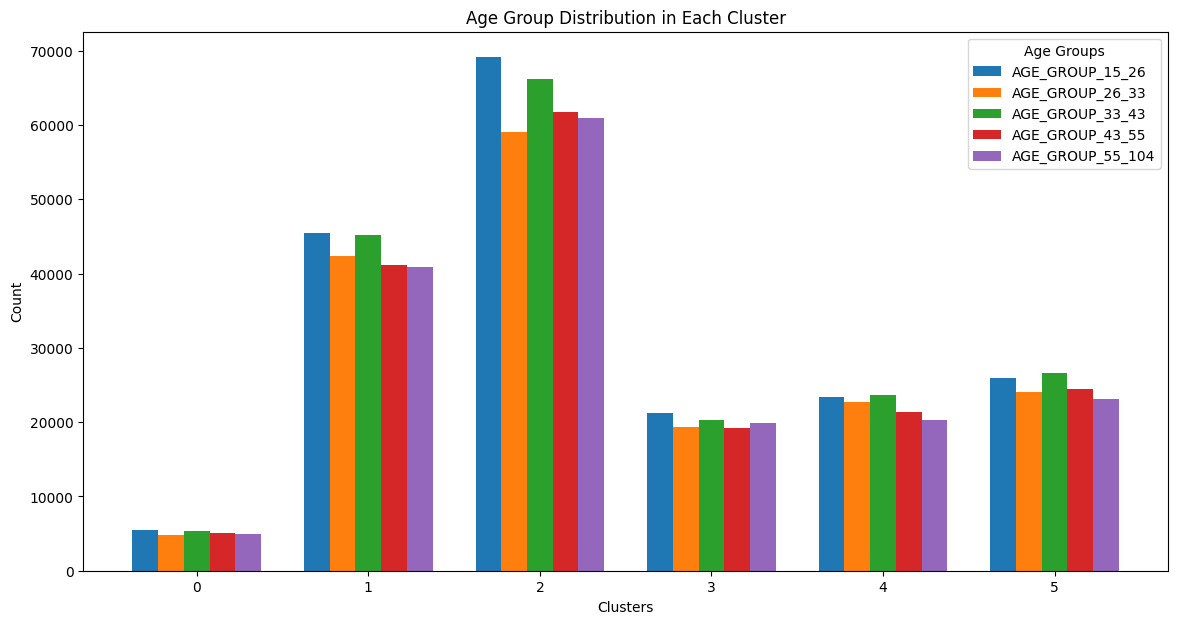

In [118]:
age_features = ['AGE_GROUP_15_26', 'AGE_GROUP_26_33', 'AGE_GROUP_33_43', 'AGE_GROUP_43_55', 'AGE_GROUP_55_104']

# Group by cluster and age group
df_age = df.groupby('cluster')[age_features].sum().reset_index()

# Transpose the dataframe
df_age_transposed = df_age.set_index('cluster').T

# Bar plot for each age group
bar_width = 0.15
index = np.arange(len(df_age_transposed.columns))

plt.figure(figsize=(14, 7))
for i, age_group in enumerate(df_age_transposed.index):
    plt.bar(index + i * bar_width, df_age_transposed.iloc[i], bar_width, label=age_group)

plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Age Group Distribution in Each Cluster')
plt.xticks(index + bar_width * (len(df_age_transposed.index) - 1) / 2, df_age_transposed.columns)
plt.legend(title='Age Groups')
plt.show()

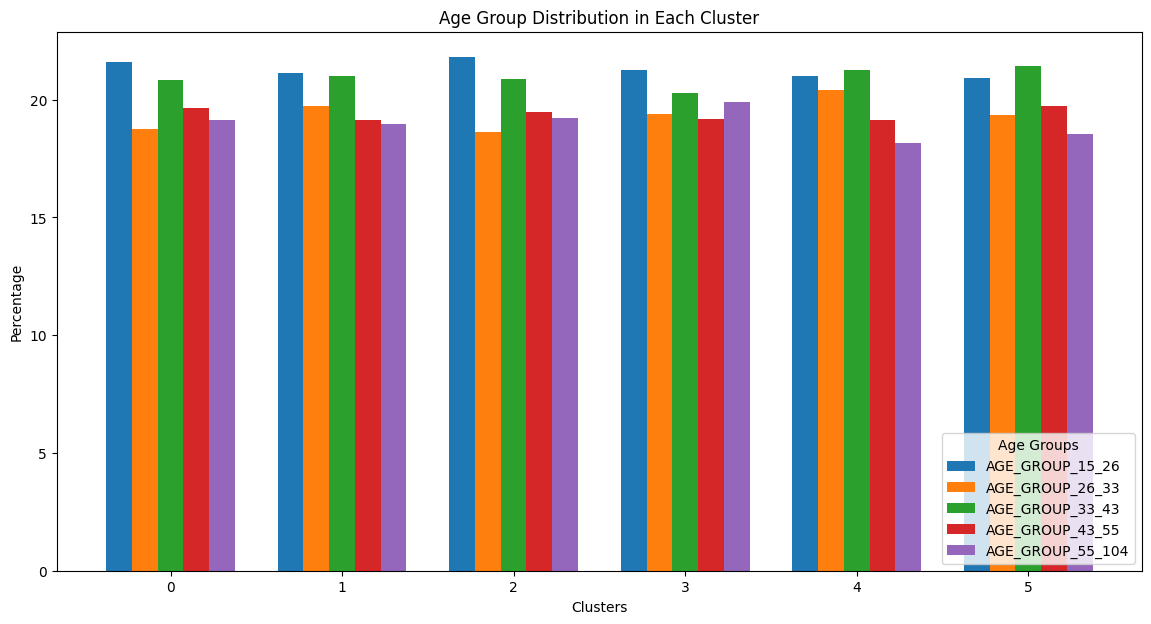

In [119]:
# Calculate the total number of elements in each cluster
cluster_sizes = df_age.set_index('cluster').sum(axis=1)

# Calculate the percentage of each age group with respect to the size of each cluster
df_age_percentage = df_age.set_index('cluster').div(cluster_sizes, axis=0) * 100

# Transpose the dataframe for plotting
df_age_percentage_transposed = df_age_percentage.T

# Bar plot for each age group
bar_width = 0.15
index = np.arange(len(df_age_percentage_transposed.columns))

plt.figure(figsize=(14, 7))
for i, age_group in enumerate(df_age_percentage_transposed.index):
    plt.bar(index + i * bar_width, df_age_percentage_transposed.iloc[i], bar_width, label=age_group)

plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.title('Age Group Distribution in Each Cluster')
plt.xticks(index + bar_width * (len(df_age_percentage_transposed.index) - 1) / 2, df_age_percentage_transposed.columns)
plt.legend(title='Age Groups', loc='lower right')
plt.show()

In [120]:
# divide the pct_neo_patented_drivers into 4 groups
df['pct_neo_patented_drivers_group'] = pd.qcut(df['pct_neo_patented_drivers'], 2)
df['pct_neo_patented_drivers_group'].value_counts()
# show the range for each group
df.groupby('pct_neo_patented_drivers_group')['pct_neo_patented_drivers'].describe()

C:\Users\giuli\AppData\Local\Temp\ipykernel_14412\1277552400.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('pct_neo_patented_drivers_group')['pct_neo_patented_drivers'].describe()


count      mean       std      min  \
pct_neo_patented_drivers_group                                         
(-0.001, 0.0508]                10870.0  0.025266  0.017073  0.00000   
(0.0508, 0.182]                 10820.0  0.082932  0.026122  0.05102   

                                     25%       50%       75%       max  
pct_neo_patented_drivers_group                                          
(-0.001, 0.0508]                0.010417  0.028571  0.040000  0.050847  
(0.0508, 0.182]                 0.062500  0.076923  0.096774  0.181818

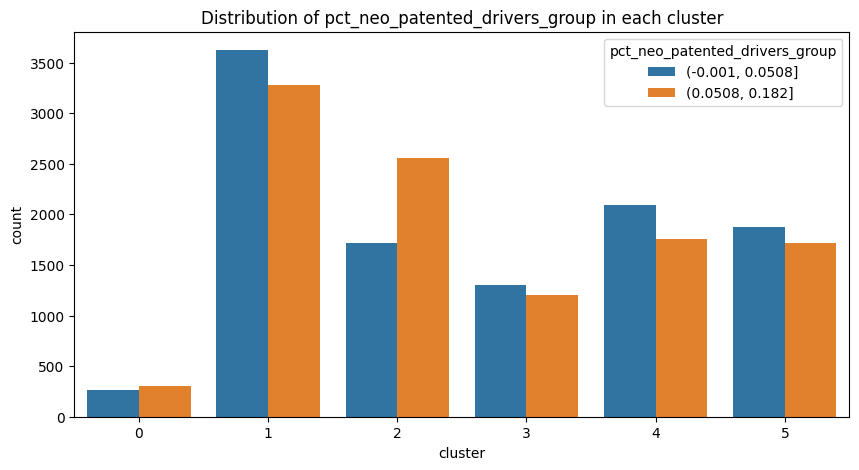

In [121]:
# check the distribution of pct_neo_patented_drivers_group in each cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', hue='pct_neo_patented_drivers_group', data=df)
plt.title('Distribution of pct_neo_patented_drivers_group in each cluster')
plt.show()


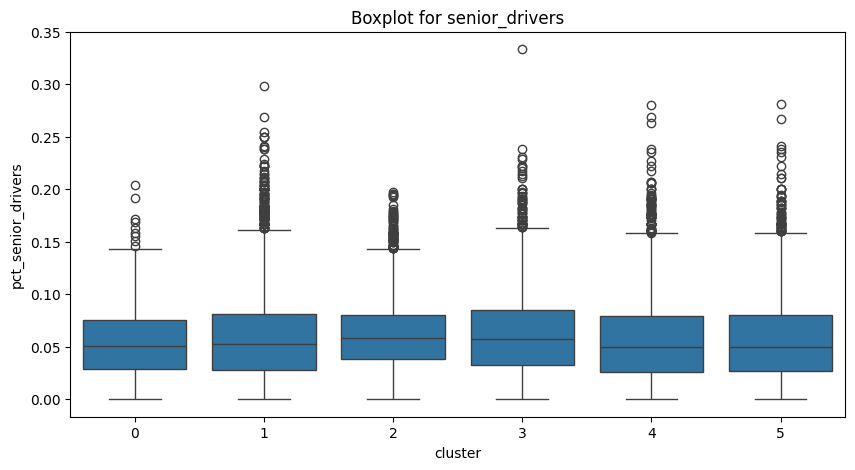

In [122]:
# the same for pct_senior_drivers
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='pct_senior_drivers', data=df)
plt.title('Boxplot for senior_drivers')
plt.show()



C:\Users\giuli\AppData\Local\Temp\ipykernel_14412\2560683497.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('pct_senior_drivers_group')['pct_senior_drivers'].describe()


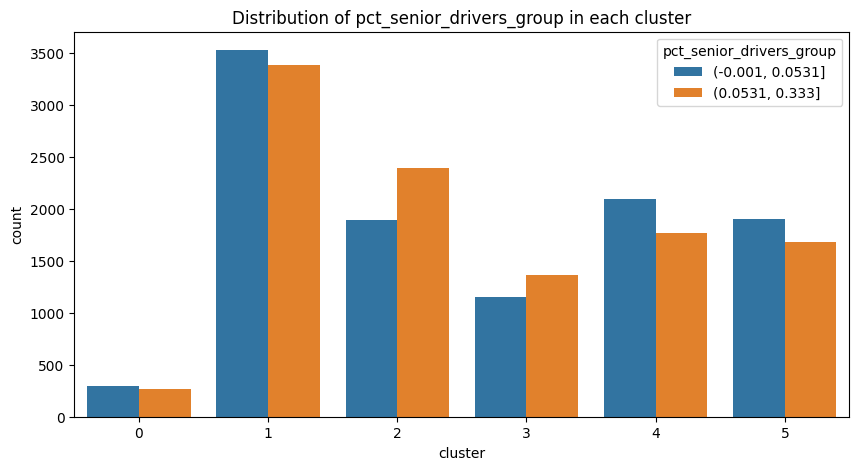

In [123]:

df['pct_senior_drivers_group'] = pd.qcut(df['pct_senior_drivers'], 2)
df['pct_senior_drivers_group'].value_counts()
df.groupby('pct_senior_drivers_group')['pct_senior_drivers'].describe()

plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', hue='pct_senior_drivers_group', data=df)
plt.title('Distribution of pct_senior_drivers_group in each cluster')
plt.show()

